<h1 align="center"> Statistical Analysis </h1>



<h2>Before Starting: </h2>
Just wanted to note that this work is not finished yet and will be constantly updated, I find that having a basic understanding in the field of Statistics is essential for Data Scientists so I decided to share a bit of that basic knowledge with the Kaggle community. If you would like to see more, upvote so I know that the community is interested in understanding the essential concepts of Statistics. Thanks and have a great day! <br><br>

<h2> Introduction: </h2> 
In this project we will explore the basic of statistical analysis and why it is important to use it in subjects such as data science. When I started working with kernels I've always heard about concepts such as <b> outliers </b> , <b> Interquartile Range (IQR) </b>, <b> hypothesis testing </b> among many others. My main aim in this simple statistical tutorial is finding out the why we need to know such concepts when performing statistical analysis. I started learning R a couple of months ago and I have found that for performing this task doing it in R tends to be more intuitive. However, Python has really good libraries such as stasmodels or the scipy stats library.



<h3> Outline: </h3>
I. <b>Statistics Basics </b> <br>
a)[ Summaries and Histograms](#summary) <br>
b) [The relationship between mean and median](#mean_median) <br>
c) [Boxplots and Suspected Outliers](#boxplots) <br>
d) [Using natural logarithms and Qplots](#qplots) <br><br>


II. <b>Inferential Statistics</b> <br>
a) [Hypothesis testing and Confidence Intervals](#hypothesis_testing) <br>
b) [Interpreting Confidence Intervals](#confidence_intervals) <br>
c) [Significance levels and P-values.](#p_val) <br>
d)[ Brief Introduction to Chi-Squared Test of Independence (will be continue)](#chi_s) <br>
e) [Contingency Tables for Categorical Variables](#contingency)<br>
f) [T-Distribution](#t_distribution) <br>
g) [Difference Between two Independent Means](#two_independent)<br>
h) [Difference Between more than two Independent Mean (ANOVA)](#anova) <br>
i) [Bootstrapping (Simulation base method)](#bootstrapping)<br><br>


III.  Other Statistics <br>
a) [Mosaic Plots and Contingency Tables](#mosaic)
b. [Chloropeth Maps with GGPlot2](#us_map)

<h3> References: </h3>
a) <a href="http://www.statisticshowto.com/"> Statistics Terminology </a><br>
b) <a href="https://www.kaggle.com/ruslankl/bio-statistics-in-r-part-1">(Bio)statistics in R: Part #1
 </a> by def me <br>
 c) <a href="https://www.coursera.org/specializations/statistics"> Statistics with R </a> Coursera Certification by Duke University <br>
 d) <a href="https://www.youtube.com/watch?v=TP6r5CTd9yM">Performing the Non-parametric Bootstrap for statistical inference using R </a> by Ian Dworkin
 e) <a href="https://www.datacamp.com/tracks/data-visualization-with-r"> Data visualization with ggplot Part 2 </a> by Rick Scavetta <br>
 f) <a href="https://stats.stackexchange.com/questions/149219/what-is-the-definition-of-expected-counts-in-chi-square-tests"> Stack Exchange Reply</a> by Penguin_Knight<br>
 g) <a href="http://rpubs.com/zach_loertscher/406399"> Outlier Detection </a> by Zach Loertscher
 
 
 <h3>Special Thanks Note: </h3>
 Special thanks to <b>Alexander Geiger </b> from Golden Oak Research for uploading this dataset.

In [1]:
# Loading Libraries
if (!require("pacman")) install.packages("pacman") 
pacman::p_load(tidyverse, skimr, GGally, plotly, viridis, caret, randomForest, e1071, rpart, 
               xgboost, h2o, corrplot, rpart.plot, corrgram, lightgbm, ggplot2, highcharter, 
               ggthemes, psych, scales, treemap, treemapify, repr, cowplot, magrittr, ggpubr,
               RColorBrewer, plotrix, ggrepel, tidyverse, gridExtra, reshape2, janitor)

lst <- c(
    "tidyverse", "skimr", "GGally", "plotly", "viridis", "caret", "randomForest", "e1071", "rpart", 
               "xgboost", "h2o", "corrplot", "rpart.plot", "corrgram", "lightgbm", "ggplot2", "highcharter", 
               "ggthemes", "psych", "scales", "treemap", "treemapify", "repr", "cowplot", "magrittr", "ggpubr",
               "RColorBrewer", "plotrix", "ggrepel", "tidyverse", "gridExtra", "reshape2", "janitor", "descr", "dplyr","boot","maps", "tidyquant",
    "wesanderson"
)

as_tibble(installed.packages())  %>% select(Package, Version)  %>% filter(Package %in% lst)

Loading required package: pacman


Package,Version
boot,1.3-20
caret,6.0-78
corrgram,1.12
corrplot,0.84
cowplot,0.9.2
descr,1.1.4
dplyr,0.7.4
e1071,1.6-8
GGally,1.3.2
ggplot2,2.2.1.9000


In [2]:
df <- read.csv('C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\real_estate_db.csv')

head(df)

UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,⋯,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
220336,NA,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,⋯,32.78177,31.91667,19.31875,440.4643,1894,0.25053,0.47388,0.30134,0.03443,0.09802
220342,NA,140,20,2,Alaska,AK,Eagle River,Anchorage,City,⋯,38.97956,39.66667,20.05513,466.6548,1947,0.94989,0.52381,0.01777,0.00782,0.13575
220343,NA,140,20,2,Alaska,AK,Jber,Anchorage,City,⋯,22.20427,23.16667,13.86575,887.6780,3570,0.00759,0.50459,0.06676,0.01000,0.01838
220345,NA,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,⋯,37.00750,34.00000,22.06347,281.4942,1049,0.20247,0.44428,0.05933,0.00000,0.21563
220347,NA,140,20,2,Alaska,AK,Anchorage,Anchorage,City,⋯,34.96611,31.75000,20.49887,655.9807,2905,0.56936,0.51034,0.08315,0.06731,0.08711
220348,NA,140,20,2,Alaska,AK,Anchorage,Anchorage,City,⋯,33.63770,28.83333,20.63591,650.4535,2560,0.45011,0.39429,0.04615,0.02418,0.10242


<a id="summary"></a>

In [3]:
summary(df)

      UID         BLOCKID           SUMLEVEL      COUNTYID         STATEID     
 Min.   :220336   Mode:logical   Min.   :140   Min.   :  1.00   Min.   : 1.00  
 1st Qu.:238817   NA's:39030     1st Qu.:140   1st Qu.: 29.00   1st Qu.:13.00  
 Median :257380                  Median :140   Median : 63.00   Median :28.00  
 Mean   :257390                  Mean   :140   Mean   : 85.67   Mean   :28.34  
 3rd Qu.:275971                  3rd Qu.:140   3rd Qu.:109.00   3rd Qu.:42.00  
 Max.   :294334                  Max.   :140   Max.   :840.00   Max.   :72.00  
                                                                               
          state          state_ab               city      
 California  : 4193   CA     : 4193   Brooklyn    :  418  
 Texas       : 2767   TX     : 2767   Chicago     :  411  
 New York    : 2565   NY     : 2565   Los Angeles :  349  
 Florida     : 2289   FL     : 2289   Houston     :  336  
 Pennsylvania: 1735   PA     : 1735   Philadelphia:  219  
 Illin

In [4]:
numerics <- select_if(df, is.numeric)
colnames(numerics)

[1] "UID"                         "SUMLEVEL"                   
 [3] "COUNTYID"                    "STATEID"                    
 [5] "zip_code"                    "area_code"                  
 [7] "lat"                         "lng"                        
 [9] "ALand"                       "AWater"                     
[11] "pop"                         "male_pop"                   
[13] "female_pop"                  "rent_mean"                  
[15] "rent_median"                 "rent_stdev"                 
[17] "rent_sample_weight"          "rent_samples"               
[19] "rent_gt_10"                  "rent_gt_15"                 
[21] "rent_gt_20"                  "rent_gt_25"                 
[23] "rent_gt_30"                  "rent_gt_35"                 
[25] "rent_gt_40"                  "rent_gt_50"                 
[27] "universe_samples"            "used_samples"               
[29] "hi_mean"                     "hi_median"                  
[31] "hi_stdev"                    "hi_sample_weight"           
[33] "hi_samples"                  "family_mean"                
[35] "family_median"               "family_stdev"               
[37] "family_sample_weight"        "family_samples"             
[39] "hc_mortgage_mean"            "hc_mortgage_median"         
[41] "hc_mortgage_stdev"           "hc_mortgage_sample_weight"  
[43] "hc_mortgage_samples"         "hc_mean"                    
[45] "hc_median"                   "hc_stdev"                   
[47] "hc_samples"                  "hc_sample_weight"           
[49] "home_equity_second_mortgage" "second_mortgage"            
[51] "home_equity"                 "debt"                       
[53] "second_mortgage_cdf"         "home_equity_cdf"            
[55] "debt_cdf"                    "hs_degree"                  
[57] "hs_degree_male"              "hs_degree_female"           
[59] "male_age_mean"               "male_age_median"            
[61] "male_age_stdev"              "male_age_sample_weight"     
[63] "male_age_samples"            "female_age_mean"            
[65] "female_age_median"           "female_age_stdev"           
[67] "female_age_sample_weight"    "female_age_samples"         
[69] "pct_own"                     "married"                    
[71] "married_snp"                 "separated"                  
[73] "divorced"

<h4> Types of Distributions </h4>
<a id="mean_median"></a>
<ul> 
<li><b> Normal Distribution: </b> Also known as bell curve, is a distribution in which half of the data lies on the left side and the other half lies on the right side of the distribution. In this distribution the curve is symmetric and the mean, mode and median are all equal. </li>
<li><b>Right Skewed Distribution:</b>has a long tail pointing to the <b>right</b>. This means that in our sample or population most of the data is concentrated to the left side of the distribution. <b> The rent mean </b> is in this case right-skewed which tells us that the average rent was mostly concentrated on the left side meaning that the majority of observations cannot afford a high rent.</li>
<li><b>Left Skewed Distribution:</b> has a long tail pointing to the <b>left</b>. This means that in our sample or population most of the data is concentrated to the right side of the distribution. <b>Debt</b> is an example of a left skewed distribution meaning that most observations have a high concentration of debt, meaning most observations are in the right side. </li>
</ul>

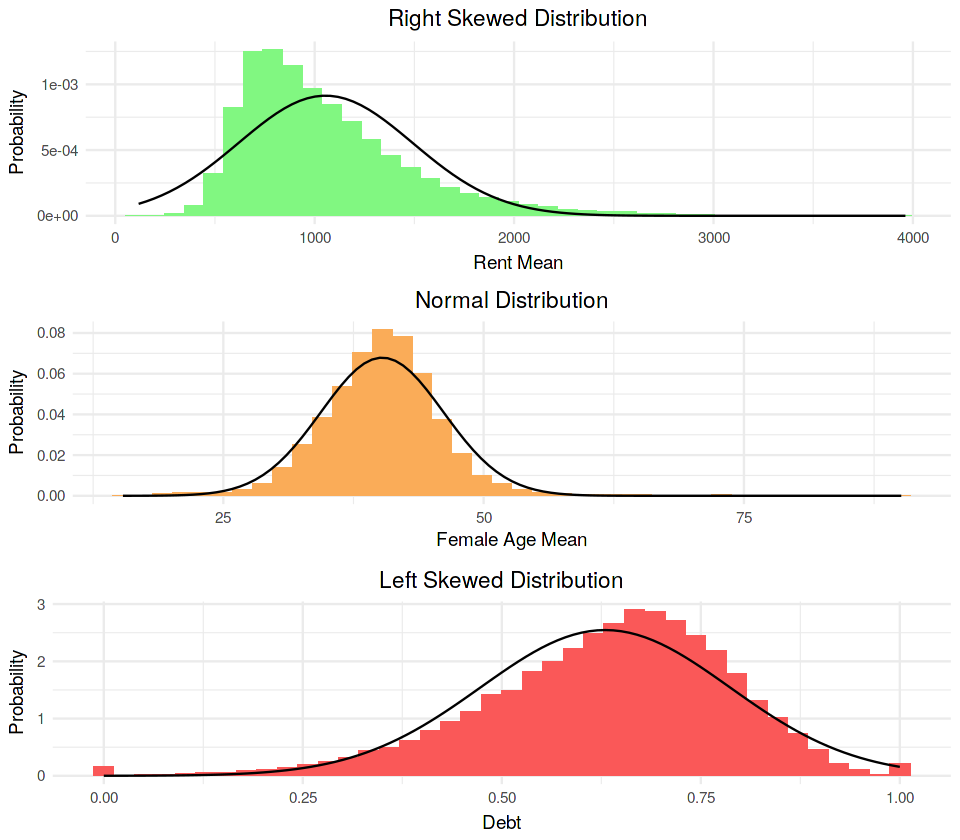

In [5]:
# What is the distribution of the family mean

options(repr.plot.width=8, repr.plot.height=7)

# numerics %>% filter(!is.na(family_mean)) %>% 
#   summarize(mean=mean(family_mean), sd=sd(family_mean))


subset.rent <- numerics %>%
  filter(!is.na(rent_mean))

p1 <- ggplot(data=subset.rent, aes(x=rent_mean))+
  geom_histogram(aes(y=..density..), bins = 40, fill="#81F781")+
  stat_function(fun=dnorm, color="black",
                args=list(mean=mean(subset.rent$rent_mean), 
                          sd=sd(subset.rent$rent_mean))) + theme_minimal() + 
theme(plot.title=element_text(hjust=0.5)) + labs(title="Right Skewed Distribution", 
                                                x="Rent Mean", y="Probability")


subset.female <- numerics %>%
  filter(!is.na(female_age_mean))


p2 <- ggplot(data=subset.female, aes(x=female_age_mean))+
  geom_histogram(aes(y=..density..), bins = 40, fill="#FAAC58")+
  stat_function(fun=dnorm, color="black",
                args=list(mean=mean(subset.female$female_age_mean), 
                          sd=sd(subset.female$female_age_mean))) + theme_minimal() + 
theme(plot.title=element_text(hjust=0.5)) + labs(title="Normal Distribution", 
                                                x="Female Age Mean", y="Probability")


subset.debt <- numerics %>%
  filter(!is.na(debt))


p3 <- ggplot(data=subset.debt, aes(x=debt))+
  geom_histogram(aes(y=..density..), bins = 40, fill="#FA5858")+
  stat_function(fun=dnorm, color="black",
                args=list(mean=mean(subset.debt$debt), 
                          sd=sd(subset.debt$debt))) + theme_minimal() + 
theme(plot.title=element_text(hjust=0.5)) + labs(title="Left Skewed Distribution", 
                                                x="Debt", y="Probability")

plot_grid(p1, p2, p3, align='h', nrow=3)

In [6]:
# Summary Statistics
cols <- numerics %>% select(debt, rent_mean, female_age_mean) %>% 
filter(!is.na(debt), !is.na(rent_mean), !is.na(female_age_mean))

do.call(cbind, lapply(cols, summary))

,debt,rent_mean,female_age_mean
Min.,0.000000,159.1344,18.67885
1st Qu.,0.539335,742.7414,36.92733
Median,0.648680,952.5263,40.35733
Mean,0.629893,1054.1723,40.33089
3rd Qu.,0.738310,1258.9640,43.55875
Max.,1.000000,3962.3423,79.83739


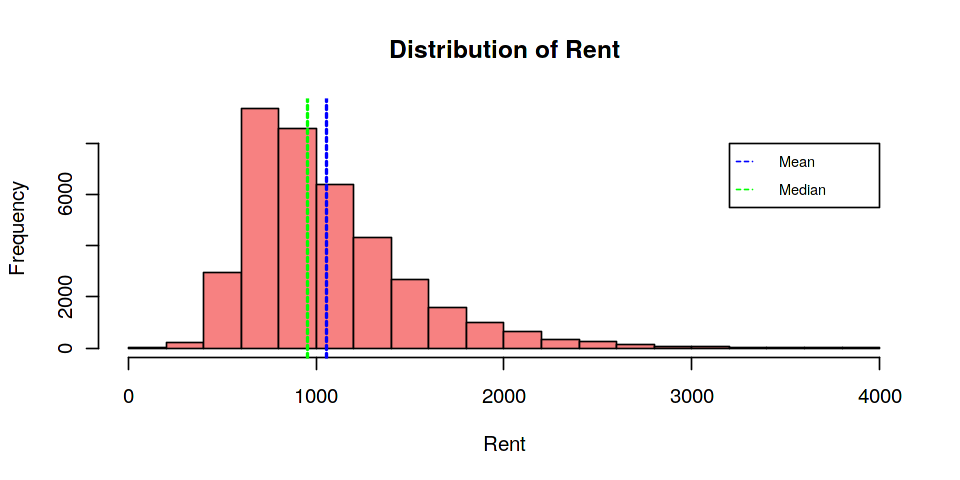

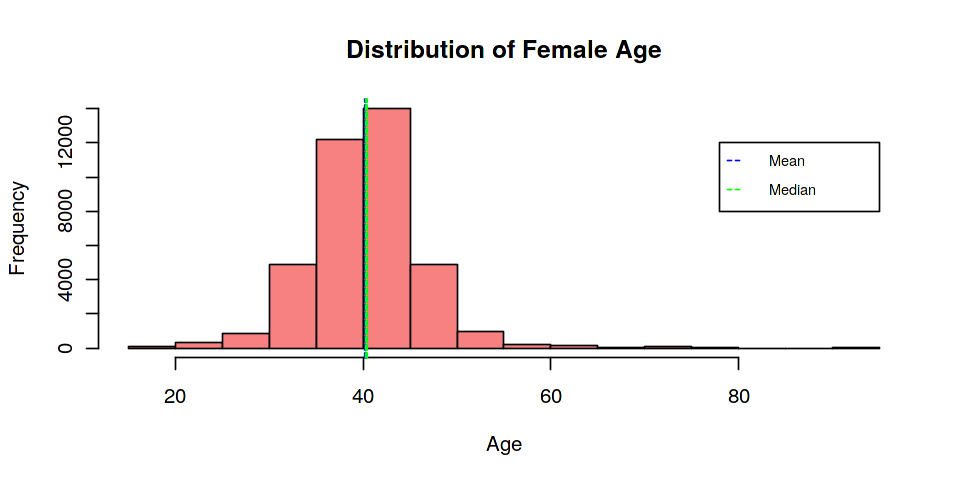

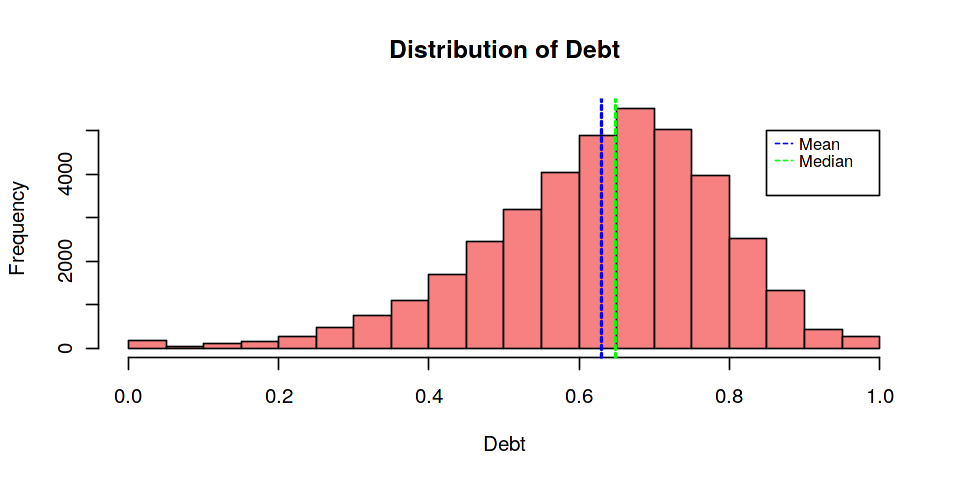

In [7]:
options(repr.plot.width=8, repr.plot.height=4)
# windows(height = 7, width = 3.5)
# Lines: Mean is the blue line and Median the green line

# First Subplot
p4 <- hist(subset.rent$rent_mean, col="#F78181", xlab="Rent", main="Distribution of Rent")
abline(v = mean(subset.rent$rent_mean), col = "blue", lwd = 2, lty="dashed")
abline(v = median(subset.rent$rent_mean), col = "green", lwd = 2, lty="dashed")
legend(x = c(4000, 3200), y = c(8000, 5500), legend=c("Mean", "Median"), col=c("blue","green"), cex=0.7, 
      lty="dashed", lwd=1, y.intersp = 3.8, x.intersp=3.5, xjust=-1.8)


# Second Subplot
p5 <- hist(subset.female$female_age_mean, col="#F78181", xlab="Age", main="Distribution of Female Age")
abline(v = mean(subset.female$female_age_mean), col = "blue", lwd = 2, lty="dashed")
abline(v = median(subset.female$female_age_mean), col = "green", lwd = 2, lty="dashed")
legend(x = c(78, 95), y = c(12000, 8000), legend=c("Mean", "Median"), col=c("blue","green"), cex=0.7, 
      lty="dashed", lwd=1, y.intersp = 3.8, x.intersp=3.5, xjust=-1.8)

# Third Subplot
p6 <- hist(subset.debt$debt, col="#F78181", xlab="Debt", main="Distribution of Debt")
abline(v = mean(subset.debt$debt), col = "blue", lwd = 2, lty="dashed")
abline(v = median(subset.debt$debt), col = "green", lwd = 2, lty="dashed")
legend(x = c(0.85, 1), y = c(5000, 3500), legend=c("Mean", "Median"), col=c("blue","green"), cex=0.8, 
      lty="dashed", lwd=1, y.intersp = 2, x.intersp=0.7, xjust=0.5)

<h4> Other Statistical Measures: </h4>
<ul>
<li><b>Variance:</b> This is an indicator of how spread our data is spread out. The smallest variabilitiy there could be is 0 while the biggest is infinite. Variance is expressed as: <br> $\sigma^2 = \frac{\sum\limits_{i=1}^N (X -\mu)^2}{N}$ </li><br>
<li><b>Standard Deviation:</b> The standard deviation is just the square root of our variance and it tells us how far our data is spread from the mean. Standard deviation is expressed as: <br>
$s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}$</li><br>
<li><b>1st Quartile</b>: This is comprised of the lowest 25% of numbers in our distribution.  </li>
<li><b>2nd Quartile (Q2)</b>: Comprised of 50% of lowest numbers up to the <b>median.</b> </li>
<li><b>3rd Quartile (Q3)</b>: Comprised of 75% of lowest numbers. </li>
<li><b> Interquartile Range (IQR)</b>: This helps us detect where most of the data lies. IQR is expressed as: <br>
IQR = $Q_1 - Q_3$  <br>
It is preferred to use IQR instead of the mean or median when trying to find out where most of the data lies.</li>

</ul>

In [9]:
# We will use the male population now
stat_rent <- numerics %>% filter(!is.na(rent_mean)) %>%
  summarise(mu = mean(rent_mean), rent_med = median(rent_mean), 
            std = sd(rent_mean), 
            rent_min = min(rent_mean), rent_max = max(rent_mean),
            rent_q1 = quantile(rent_mean, 0.25),  # first quartile, 25th percentile
            rent_q3 = quantile(rent_mean, 0.75),# third quartile, 75th percentile
           rent_iqr=rent_q3 - rent_q1)  # Interquartile Range

stat_fage <- numerics %>% filter(!is.na(female_age_mean)) %>%
  summarise(mu = mean(female_age_mean), fage_med = median(female_age_mean), 
            std = sd(female_age_mean),
            fage_min = min(female_age_mean), fage_max = max(female_age_mean),
            fage_q1 = quantile(female_age_mean, 0.25),  # first quartile, 25th percentile
            fage_q3 = quantile(female_age_mean, 0.75), # third quartile, 75th percentile
           fage_iqr=fage_q3 - fage_q1) # Interquartile Range


stat_debt <- numerics %>% filter(!is.na(debt)) %>%
  summarise(mu = mean(debt), debt_med = median(debt), 
            std = sd(debt),
            debt_min = min(debt), debt_max = max(debt),
            debt_q1 = quantile(debt, 0.25),  # first quartile, 25th percentile
            debt_q3 = quantile(debt, 0.75), # third quartile, 75th percentile
           debt_iqr=debt_q3 - debt_q1)  # Interquartile Range

print("Rent Mean Statistics")
print("---------------------")
kable(stat_rent)
print("Female Age Mean Statistics")
print("---------------------------")
kable(stat_fage)
print("Debt Statistics")
print("---------------")
kable(stat_debt)

[1] "Rent Mean Statistics"
[1] "---------------------"




|       mu| rent_med|      std| rent_min| rent_max|  rent_q1|  rent_q3| rent_iqr|
|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| 1054.833| 952.9741| 436.5636|   117.15| 3962.342| 742.6814| 1259.885| 517.2036|

[1] "Female Age Mean Statistics"
[1] "---------------------------"




|       mu| fage_med|      std| fage_min| fage_max|  fage_q1| fage_q3| fage_iqr|
|--------:|--------:|--------:|--------:|--------:|--------:|-------:|--------:|
| 40.25749| 40.32055| 5.876502| 15.36024| 90.10794| 36.83268| 43.5485| 6.715817|

[1] "Debt Statistics"
[1] "---------------"




|        mu| debt_med|       std| debt_min| debt_max| debt_q1| debt_q3| debt_iqr|
|---------:|--------:|---------:|--------:|--------:|-------:|-------:|--------:|
| 0.6299163|  0.64879| 0.1566799|        0|        1| 0.53929| 0.73859|   0.1993|

<h4> Boxplots and Suspected Outliers: </h4>
<a id="boxplots"></a>

<img src="http://visualoop.com/media/2015/04/box_plot_anatomy.png">



<h4> A Word Regarding Outliers: </h4>
I just wanted to add in this section that outliers should be carefully analyzed and although there are common rules such as that in a "normal distribution" any value beyond three standard deviations should be consider an outlier. Eventhough, there is a small probability that a value in a normal distribution is 3 standard deviations away from the mean, we should carefully analyze as of why is this the case. It could be that in data was mistyped which will weakened the theory that a specific observation is an outlier.

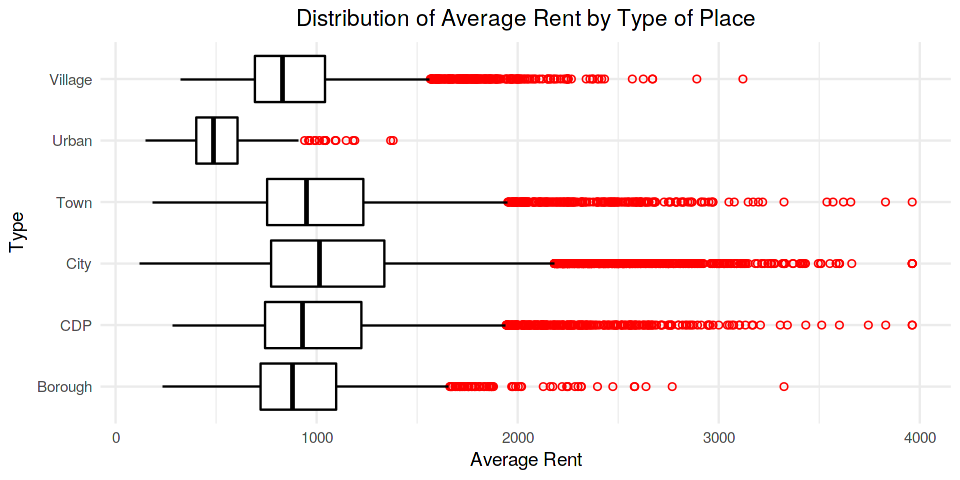

In [10]:
# Use boxplots to explain better the concepts of quartiles

# We will use type of place
t.place <- df %>% select(rent_mean, type) %>% 
filter(!is.na(rent_mean), !is.na(type)) %>%
ggplot(aes(x=type, y=rent_mean)) + geom_boxplot(fill="white", colour="black", 
                                                outlier.colour = "red", outlier.shape = 1) + 
theme_minimal() + theme(plot.title=element_text(hjust=0.5)) + coord_flip() + 
labs(title="Distribution of Average Rent by Type of Place", x="Type", y="Average Rent")

t.place + scale_fill_manual(values=c("#999999", "#E69F00"))

<h4> Understanding Q-Plots </h4>
<a id="qplots"></a>
<ul>
<li><b> Right Skewed Qplot: </b> When the distribution is right skewed, the observations tend to go above the red line indicating that the distribution is right-skewed.
<li><b> Normal Distribution Qplot: </b> Although some observations are not on the line, most of the observations are on the line which indicates that the distribution is mostly normal. </li>
<li><b>Left Skewed Qplot: </b> Although this distribution is not strongly left skewed, we can see that most observations fall below the red line, indicating that the distribution is left-skewed. </li>
</ul>

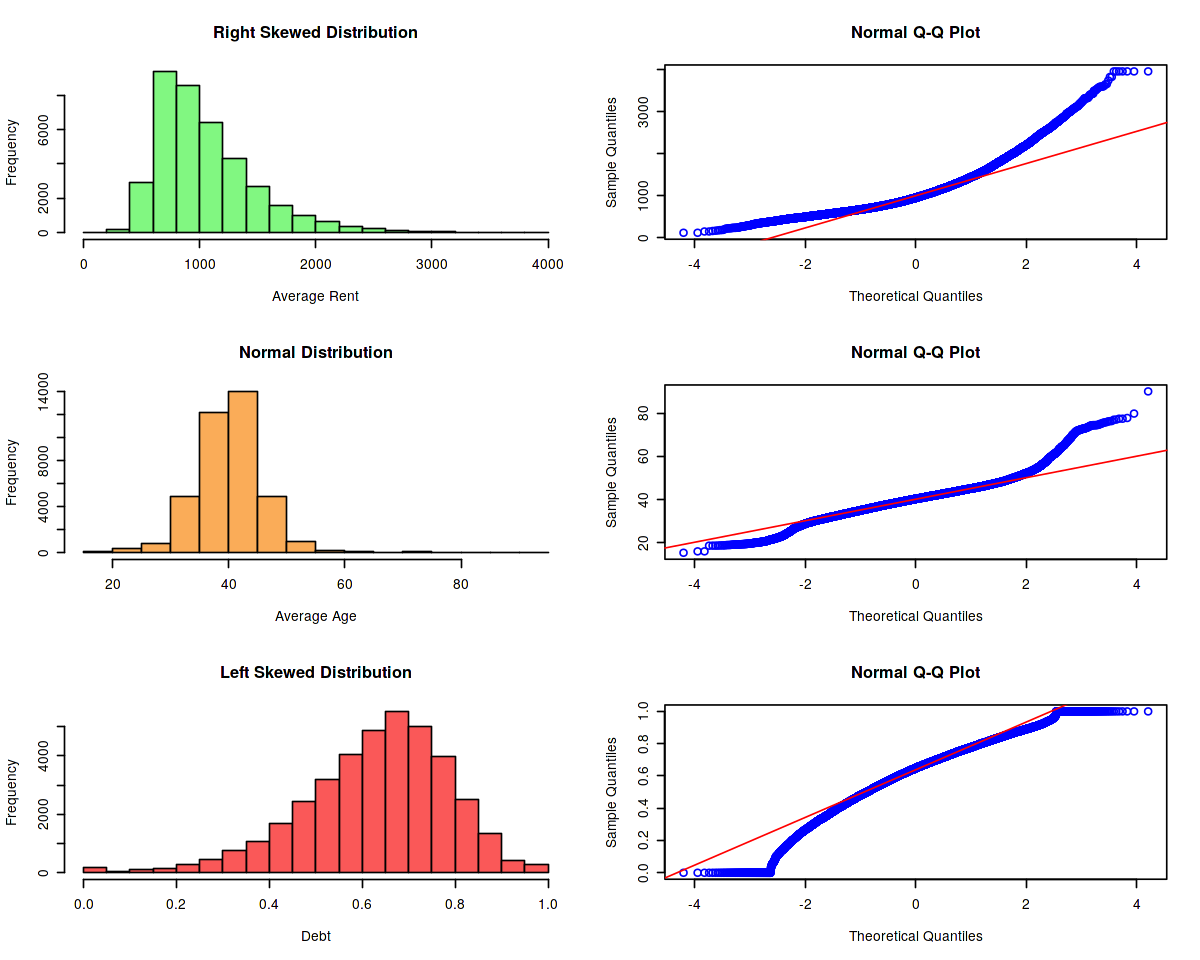

In [11]:
# Right Skew
options(repr.plot.width=10, repr.plot.height=8)
par(mfrow=c(3,2)) 
# First subplot (Right Skewed)
hist(subset.rent$rent_mean, main="Right Skewed Distribution", xlab="Average Rent", col="#81F781")
qqnorm(subset.rent$rent_mean, col="blue")
qqline(subset.rent$rent_mean, col="red")

# Second subplot (Normal Distribution)
hist(subset.female$female_age_mean, main="Normal Distribution", xlab="Average Age", col="#FAAC58")
qqnorm(subset.female$female_age_mean, col="blue")
qqline(subset.female$female_age_mean, col="red")

# Third Subplot
hist(subset.debt$debt, main="Left Skewed Distribution", xlab="Debt", col="#FA5858")
qqnorm(subset.debt$debt, col="blue")
qqline(subset.debt$debt, col="red")

<h3>Using Natural Logarithms to Create a Normal Distributions: </h3> 
Although sometimes using natural logarithms does not necesarily impact the observations to form a normal distribution (left-skewed example), most of the times it gives us an approximate normal distribution just like in the right-skewed example. <br>

<b> Why would we want a normal distribution?</b><br>
Although there are many ways to deal with skewedness, most of the statistical techniques assume that the distribution is "normal". We will further explain, which statistical techniques are those. Statistical tests such as z, t and F-tests, assume that the mean is "normally" distributed. Moreover, it is somewhat simpler to calculate probabilities and to calculate confidence intervals assuming the distribution meets the <b> Central Limit Theorem (CLT) </b> conditions. 


<b> More on Central Limit Theorem Conditions: </b><br>
<a href="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html"> More on Central Limit Theorem </a>

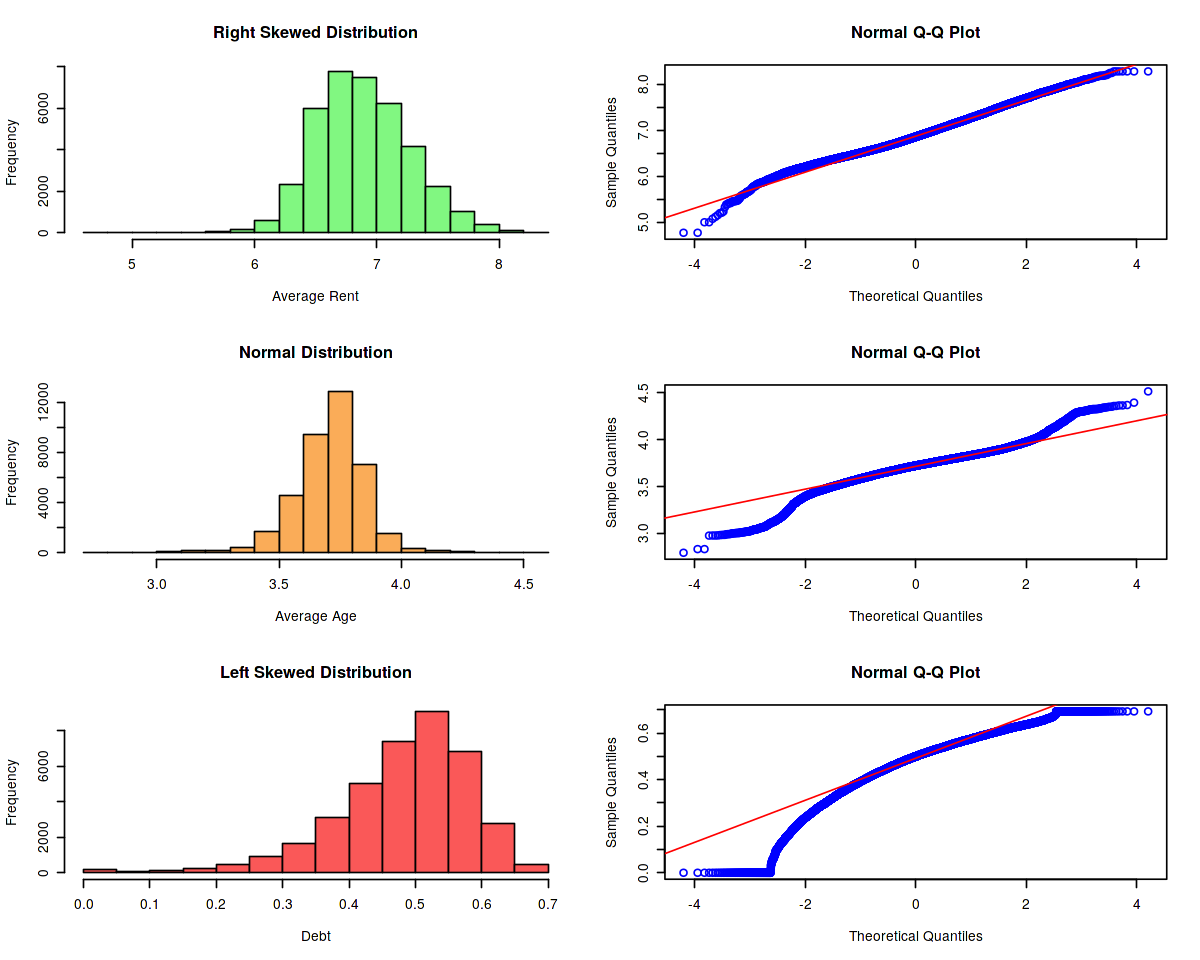

In [12]:
# Right Skew
options(repr.plot.width=10, repr.plot.height=8)
par(mfrow=c(3,2)) 
# First subplot (Right Skewed)
hist(log1p(subset.rent$rent_mean), main="Right Skewed Distribution", xlab="Average Rent", col="#81F781")
qqnorm(log1p(subset.rent$rent_mean), col="blue")
qqline(log1p(subset.rent$rent_mean), col="red")

# Second subplot (Normal Distribution)
hist(log1p(subset.female$female_age_mean), main="Normal Distribution", xlab="Average Age", col="#FAAC58")
qqnorm(log1p(subset.female$female_age_mean), col="blue")
qqline(log1p(subset.female$female_age_mean), col="red")

# Third Subplot
hist(log1p(subset.debt$debt), main="Left Skewed Distribution", xlab="Debt", col="#FA5858")
qqnorm(log1p(subset.debt$debt), col="blue")
qqline(log1p(subset.debt$debt), col="red")

### Visualizing Confidence Intervals with ggplot:
With Confidence intervals we make sure how confident we are of what is the true population average.<b> The wider the error bars, the less certain of what the true mean is. </b>

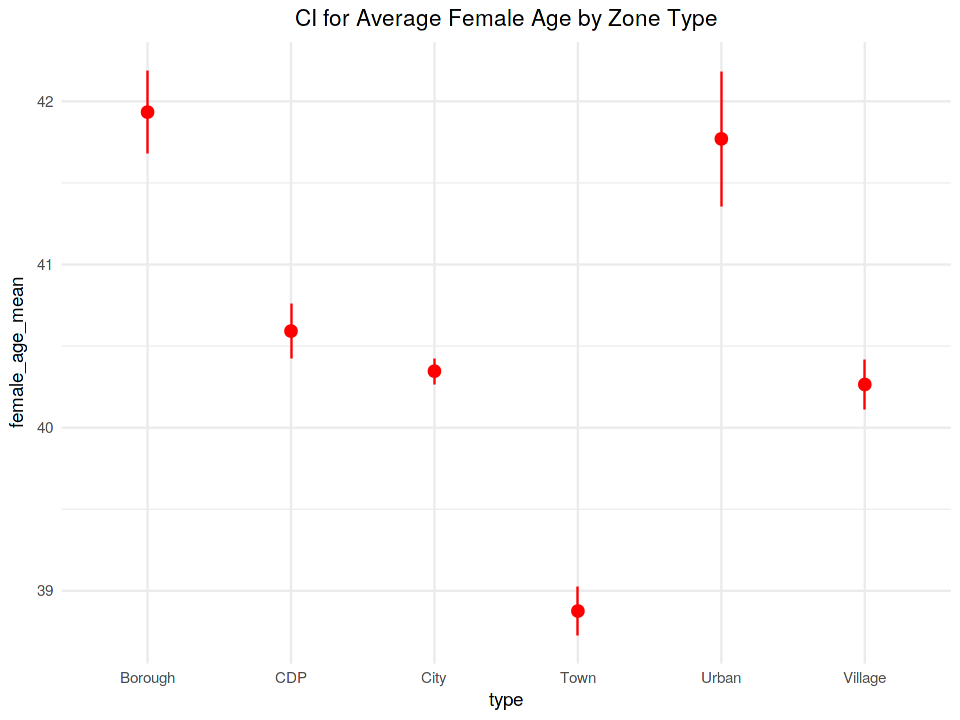

In [13]:
options(repr.plot.width=8, repr.plot.height=6)
subset.female <- df %>% filter(!is.na(female_age_mean))

ggplot(data=subset.female, aes(x=type, y=female_age_mean)) + stat_summary(fun.data=mean_cl_normal, color="red") + theme_minimal() + 
theme(plot.title=element_text(hjust=0.5)) + labs(title="CI for Average Female Age by Zone Type")

In [14]:
# Function to find the female range
age_range <- function(x) {
  # Change x below to return the instructed values
  data.frame(ymin = min(x), # Min
             ymax = max(x)) # Max
}

age_range(subset.female$female_age_mean)


# Finding the Interquartile Range
# Function to Custom function
IQR <- function(x) {
  # Change x below to return the instructed values
  data.frame(median = median(x), # Median
             first_quartile = quantile(x, 0.25), # 1st quartile
             third_quartile = quantile(x, 0.75),
            interquartile_range=(quantile(x, 0.75) - quantile(x, 0.25))) # 3rd quartile
}

IQR(subset.female$female_age_mean)

ymin,ymax
15.36024,90.10794


,median,first_quartile,third_quartile,interquartile_range
25%,40.32055,36.83268,43.5485,6.715817


<h3> Inference Statistics: </h3>
<a id="hypothesis_testing"></a>
In this section we will talk about the importance of confidence intervals and how can we find the confidence interval of a distribution. Moreover, we will go briefly into the topics of hypothesis testing and explain why it is important to know these concepts before even trying to answer the question to our main problem.


<h4>Hypothesis Testing (Guilty or not Guilty?) </h4>
Imagine a scenario where an individual is in a trial for commiting a murder in the United States. As far as we know, when an individual is consider <b>"innocent"</b> until proven otherwise. Through this brief example I would like to introduce the concept of <b>Hypothesis Testing</b>. There are two types of hypothesis the <b> Null Hypothesis </b> and the <b> Alternative Hypothesis.</b><br>


<ul> 
<li> <b> Null Hypothesis ($H_0$): </b> This is the "status quo", in our example the individual who is in trial is <b>innocent</b>. When we want to compare means of two variables let's say the average income of male and female the Null hypothesis in this case will be that there is "no difference". </li>
<li> <b> Alternative Hypothesis ($H_A$): </b> This is going against what the Null Hypothesis was stating. An individual who went to trial is <b>guilty.</b>In our average income by gender example, the average income of males does not equal the average income of females. </li>

</ul>

<b> Null Hypothesis (Average Income Example): </b><br>
$Aincome_M = Aincome_F$ <br><br>

<b> Alternative Hypothesis (Average Income Example): </b><br>
$Aincome_M \ne Aincome_F$



<h4> Confidence Intervals and P-values: </h4> 

<img src="https://www.researchgate.net/profile/Vladimir_Kekez/publication/271846185/figure/fig6/AS:295099222249473@1447368545063/Visual-interpretation-of-distribution-of-Significance-Level-p-values-and-z-score-in.png">
<b>Confidence Intervals (CI)</b> are how certain a specific value will lie between two specific points. The most common types of confidence intervals are the 90%, 95% and 99% conficence intervals although the 95% is the one that is most commonly used and is the one we will use in this example.<br>

<b> P-value:</b> is the probability of ocurrence of a given event. Assuming a confidence interval is 95%, if p-value < $\alpha$, then we reject the Null Hypothesis in favor of the Alternative Hypothesis. <br>

<b> Significance Level:</b> is the probability of rejecting the Null Hypothesis (also denoted as alpha or $\alpha$.

<b> Finding the Confidence Interval for the Population Mean: </b><br><br>

$\overline{x}\pm z^* s \frac{s}{\sqrt{N-1}}$<br>

$\overline{x}$ = Sample Mean <br>
z = z-score <br>
s = Standard Error <br>
N = Sample size

Warning message:
“Removed 77 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

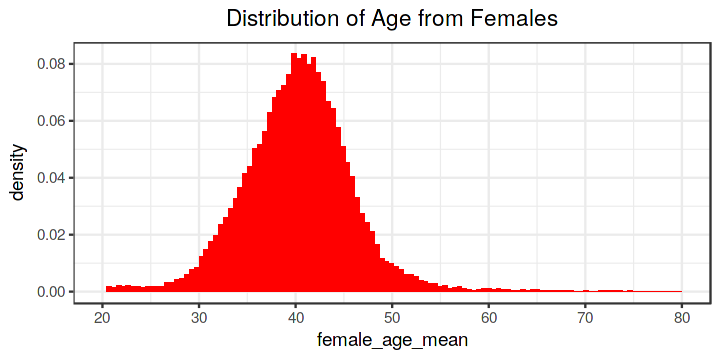

In [15]:
# Let's calculate the 95% Confidence Level of Male_Age_Mean (Normal Distribution)
# Cut the x-axis
options(repr.plot.width=6, repr.plot.height=3)

# First let's see if Male_Age_Mean follows a normal distribution one of the criterias
f.age <- numerics %>% select(female_age_mean) %>% filter(!is.na(female_age_mean)) %>%
ggplot(aes(x=female_age_mean, y=..density..)) + geom_histogram(bins = 120, fill="red") + 
theme_bw() + scale_x_continuous(breaks = seq(20, 80, 10),
                               limits=c(20, 80)) + labs(title="Distribution of Age from Females") + 
theme(plot.title=element_text(hjust=0.5))

f.age

In [16]:
# Technique 1: Manually using the statistical measures.

# Sample size
n <- numerics %>% filter(!is.na(female_age_mean)) %>% nrow()
print(paste0("Number of rows after filtering Null values ", n))
# standard deviation
std <- numerics %>% filter(!is.na(female_age_mean)) %>% summarise(std=sd(female_age_mean))
# Sample mean
x_bar <- numerics %>% filter(!is.na(female_age_mean)) %>% summarise(avg=mean(female_age_mean))

# standard error 95% confidence level
# We used a negative sign to turn it positive
serror <- -qnorm(0.025)*std/sqrt(n)

lower_interval <- x_bar - serror
upper_interval <- x_bar + serror

print(paste0("The lower interval is ", round(lower_interval,2), "  Upper interval is: ", round(upper_interval, 2)))


f.age <- numerics %>% filter(!is.na(female_age_mean))

# Technique #2 using rcompanion library (Not able to use on Kaggle but it is simpler to use)
# groupwiseMean(female_age_mean ~ 1, 
#               data   = f.age, 
#               conf   = 0.95, 
#               digits = 7)

[1] "Number of rows after filtering Null values 38728"
[1] "The lower interval is 40.2  Upper interval is: 40.32"


<b> So how do we interpret this confidence level example? </b><br>
<a id="confidence_intervals"></a>
95% of random samples from a sample size of 38,728 (female_age_mean without Nulls) of female Americans will yield confidence intervals that capture the true population age mean of females. (40.2 - 40.32)

In [17]:
# Manually added rep_sample_n function from statsr library
rep_sample_n <- function(tbl, size, replace = FALSE, reps = 1)
{
    n <- nrow(tbl)
    i <- unlist(replicate(reps, sample.int(n, size, replace = replace), simplify = FALSE))

    rep_tbl <- cbind(replicate = rep(1:reps,rep(size,reps)), tbl[i, , drop=FALSE])

    dplyr::group_by(rep_tbl, replicate)
}


# As we increase sample size the greater the accuracy
n <- 50
ci_95 <- qnorm(0.975)


ci <- f.age %>%
  rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
  summarise(lower = mean(female_age_mean) - ci_95 * (sd(female_age_mean) / sqrt(n)),
            upper = mean(female_age_mean) + ci_95 * (sd(female_age_mean) / sqrt(n)))


# Let's see how many times is the actual mean between the lower and upper bounds
f.avg <- f.age %>% summarise(avg=mean(female_age_mean))


ci <- ci %>%
  mutate(capturing_avg = ifelse(lower < f.avg$avg & upper > f.avg$avg, "In Between", "Out of Bounds"))

score <- length(which(ci$capturing_avg == "In Between")) / nrow(ci) * 100


print(paste0("The percentage in which the true average is 'in between': ", score, "%"))

[1] "The percentage in which the true average is 'in between': 94%"


In [18]:
# We need the mean, standard deviation, sample mean, sample size
# To make sample mean and standard deviation get the information from the same sample.
set.seed(42)
mu <- mean(f.age$female_age_mean)
n <- 50 # Sample size
x_bar <- mean(sample(f.age$female_age_mean, 50))
std_bar <- sd(sample(f.age$female_age_mean, 50))
standard_error <- qnorm(0.025)*std_bar/sqrt(n) # 95% confidence level

# The Z-score
z_score <- (x_bar - mu)/standard_error

print(paste0("Z_score is: ", round(z_score, 2)))

z <- (3.2 - 3) / 0.246

# p-value for two sides
p_val <- 2*pnorm(-abs(z_score))
print(paste0("Two sided p-value is:  ", round(p_val,2)))

# p-value for one side
ones_pval <- p_val / 2
print(paste0("One sided p-value is:  ", round(ones_pval,2)))

[1] "Z_score is: 0.15"
[1] "Two sided p-value is:  0.88"
[1] "One sided p-value is:  0.44"


<a id="p_val"></a>
<b> In this case, since p-value is > than $\alpha$ we do not reject $H_0$</b>

<h4>Contingency Tables: </h4>
<a id="contingency"></a>
The main goal of contingency tables is to summarize the relationship between two categorical variables. In this example, we summarize the relationship between state and type.

<h4> Chi-Squared Test of Independence </h4>
<a id="chi_s"> </a>
<ul>
    <li><b>Null Hypothesis($H_0$):</b> There is no association between the two variables. </li>
    <li><b>Alternative Hypothesis ($H_A$):</b> There is an association between the two variables and hence, the variables are dependent. </li>
</ul>

<b> Note:</b> I will go later more in-depth into the test of independency and what does it mean however, I just wanted to show a simple way to make sure that independency exists between two variables in order to meet one of the conditions of the <b> Central Limit Theorem.</b>

In [19]:
categoricals <- select_if(df, is.factor)

colnames(categoricals)

[1] "state"    "state_ab" "city"     "place"    "type"     "primary"

In [20]:
mytable <- table(categoricals$type, categoricals$state)
summary(mytable) # chi-square test of indepedence

Number of cases in table: 39030 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 195150, df = 255, p-value = 0
	Chi-squared approximation may be incorrect

<b>In later updates I will go more in depth into the chi squared test of independence. </b>

In [21]:
cont.table <- categoricals %>% select(state, type) %>% table() %>% prop.table() %>% `*` (100) %>% round(2)

cont.table

                      type
state                  Borough   CDP  City  Town Urban Village
  Alabama                 0.00  0.00  0.00  1.57  0.00    0.00
  Alaska                  0.00  0.00  0.27  0.00  0.00    0.00
  Arizona                 0.00  2.04  0.00  0.00  0.00    0.00
  Arkansas                0.00  0.00  0.93  0.00  0.00    0.00
  California              0.00  0.00 10.74  0.00  0.00    0.00
  Colorado                0.00  0.00  1.71  0.00  0.00    0.00
  Connecticut             0.00  1.14  0.00  0.00  0.00    0.00
  Delaware                0.00  0.00  0.00  0.28  0.00    0.00
  District of Columbia    0.00  0.00  0.25  0.00  0.00    0.00
  Florida                 0.00  0.00  5.86  0.00  0.00    0.00
  Georgia                 0.00  0.00  2.76  0.00  0.00    0.00
  Hawaii                  0.00  0.45  0.00  0.00  0.00    0.00
  Idaho                   0.00  0.00  0.38  0.00  0.00    0.00
  Illinois                0.00  0.00  0.00  0.00  0.00    4.08
  Indiana                 0.

<ul> 
    <li><b> First Row:</b> Number of Observations.  </li>
    <li><b>Second Row:</b> Chi Square Contribution. </li>
    <li><b> Third Row:</b>Total Percentage per Row </li>
    <li><b>Fourth Row: </b> Total Percentage per Column </li>
    <li><b>Fifth Row:  </b>Total Percentage of the Table. </li>
    </ul>

In [22]:
# Contingency Table with CrossTable
library(descr)
# There might be a problem with the NAS

type_state <- df %>% filter(!is.na(type), !is.na(state)) 

CrossTable(type_state$state, type_state$type, prop.c=TRUE, prop.chisq=TRUE, prop.t=TRUE)


Attaching package: ‘descr’

The following object is masked from ‘package:janitor’:

    crosstab

Warning message in chisq.test(tab, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”

   Cell Contents 
|-------------------------|
|                       N | 
| Chi-square contribution | 
|           N / Row Total | 
|           N / Col Total | 
|         N / Table Total | 
|-------------------------|

                        type_state$type
type_state$state          Borough        CDP       City        Town       Urban     Village   Total
---------------------------------------------------------------------------------------------------
Alabama                         0          0          0         612           0           0     612
                           27.205     81.788    340.544    3365.966       7.668      71.690        
                            0.000      0.000      0.000       1.000       0.000       0.000   0.016
                            0.000      0.000      0.000       0.115       0.000       0.000        
                            0.000      0.000      0.000       0.016       0.000       0.000        
----------------------------------------

<h4> T-Distribution </h4>
<a id="t_distribution"></a>
<img src="https://i2.wp.com/www.real-statistics.com/wp-content/uploads/2012/11/t-distribution-chart.png?resize=439%2C264">
The t-distribution is a distribution that is only used for small samples. The first question I had when dealing with this types of distribution is why we need a t-distribution when we receive daily tons of data making it impossible to have a small sample. Well, t-distributions are more often used when <b>conducting an experiment</b> which usually have smaller samples. <br><br>

<b>Summary of t-Distribution: </b>
<ul>
    <li><b>Sample Size: </b> The sample size must be smaller than 30 in order to be considered for a t-distribution. </li>
    <li><b>Degrees of freedom:</b> As the sample size gets closer to 30, the t-distribution will look exactly like a normal distribution. Also, degrees of freedom determines the thickness of the tail. </li>
    <li><b>T-score: </b> To calculate the t-score we use the following formula, $(\overline{x} - Null) / s$ where s is the standard error and Null the Null Hypothesis.</li>
    
</ul>


<b> Excercise 1: Let's find the 95% Confidence Interval of a sample for the rent_mean in the state of New York.</b>

In [23]:
# Doing inference with the t-distribution Course 2 Week 3



two_states <- df %>% select(state, rent_mean) %>% filter(state == "California"| state == "New York") %>%
filter(!is.na(rent_mean))

# On one sample degrees of freedom is (n - 1)
set.seed(42)
sample_twostates <- sample_n(two_states, 22)

# Finding the critical t-score (We always use a positive critical score.)
# qt(0.025, df=23)


# Let's estimate the rent average for the state of New York using a 95% confidence level
ny_samp <- sample_twostates %>% filter(state == "New York")

# sample size 
n <- ny_samp %>% nrow()
# Sample mean
x_bar <- ny_samp %>% summarise(avg=mean(rent_mean))
# t-score (df = n - 1)
t_score <- abs(qt(0.025, df=11))

std_ny <- ny_samp %>% summarise(std=sd(rent_mean))

# Find the 95% confidence interval
upper_bound <- x_bar + t_score * (std_ny / sqrt(n))
lower_bound <- x_bar - t_score * (std_ny / sqrt(n))

# We are 95% confident that the  rent mean for the city of new york lies between 934 - 1417

<b> Excercise 2: Assume Mu = 1000 for the rent of New York, let's find the p-value to see if there is sufficient evidence that we could reject $H_0$ in favor of $H_A$, remember if the p-value is less than 0.05 significance level then we reject the Null in favor of the alternative. </b>

In [24]:
# Let's find the p-value let's assume that the Null is that the Mu = 1000
standard_error <- std_ny / sqrt(n)


# Let's find the t-score
mu <- 1000
t_score <- (x_bar -  mu) / standard_error



# We have a t-score of 1.605
# degrees of freedom = 11

# Let's find the p-value
# We need the two tails 
2 * pt(1.605, df=11, lower.tail=FALSE)

[1] 0.1367962

Since our p-value is greater than 0.05 we go in favor of the <b> Null Hypothesis </b> , meaning that there is not sufficient evidence that the average rent in New York is something different than 1000.

<h4> Estimating the Difference between independent Means from two categorical variables</h4>
<a id="two_independent"></a>

<ul>
    <li><b>Degrees of Freedom: </b> df = $Min(n_1 - n_2)$ </li>
    <li><b> Point of Estimates (Sample Mean): </b>   ($\overline{x_1} {-} \overline{x_2}$) </li>
    <li><b> Standard Error of difference between two independent means:</b> $SE(_\overline{x_1}-_\overline{x_2})$ = $\sqrt{SE_1^2} + \sqrt{SE_2^2}$ <br> where $SE_1$ = $\frac{S_1}{\sqrt{n_1}}$ and $SE_2$ = $\frac{S_2}{\sqrt{n_2}}$</li>
    <li><b>Difference between independent means formula:</b> SE = $(\overline{x_1} - \overline{x_2})\pm t^*_{df} SE_{\overline{x_1} - \overline{x_2}}$ </li>
</ul>

Warning message:
“Removed 64 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 64 rows containing non-finite values (stat_summary).”

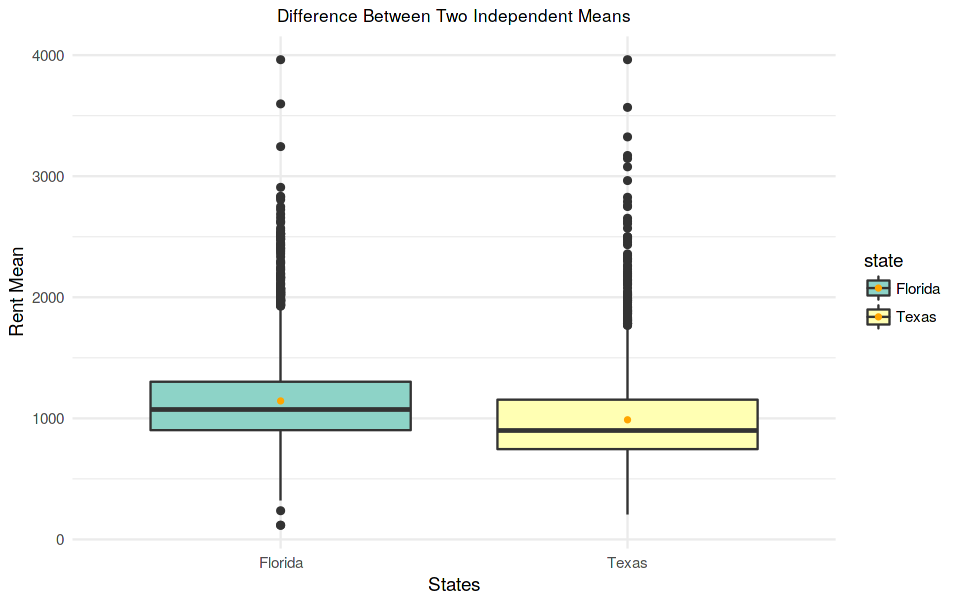

In [25]:
# Boxplots of means of florida and texas
options(repr.plot.width=8, repr.plot.height=5)


south_states <- df %>% select(state, rent_mean) %>% filter(state == "Texas" | state == "Florida") %>%
ggplot(aes(x=state, y=rent_mean, fill=state)) + geom_boxplot() + 
stat_summary(fun.y=mean, colour="orange", geom="point", size=1) + 
theme_minimal() + 
theme(plot.title=element_text(hjust=0.5, size=10)) + 
labs(title="Difference Between Two Independent Means", y="Rent Mean", x="States") + 
scale_fill_brewer(palette="Set3")

south_states

In [26]:
set.seed(42)

# Same sample size between the two categories (n = 24)
two_states <- df %>% select(state, rent_mean) %>% filter(!is.na(rent_mean)) %>% 
filter(state == "Florida" | state == "Texas") %>% group_by(state) %>%
do(sample_n(., size = 24))


small_sample <- two_states %>% ungroup() 


# # Sample sizes 
n_1 <- small_sample %>% filter(state == "Texas") %>% nrow()
n_2 <- small_sample %>% filter(state == "Florida") %>% nrow()

# Sample mean for each state
xbar_tex <- small_sample %>% filter(state == "Texas") %>% summarise(avg=mean(rent_mean))
xbar_flo <- small_sample %>% filter(state == "Florida") %>% summarise(avg=mean(rent_mean))

# Standard deviation
std_tex <- small_sample %>% filter(state == "Texas") %>% summarise(std=sd(rent_mean))
std_flo <- small_sample %>% filter(state == "Florida") %>% summarise(std=sd(rent_mean))

# Degrees of freedom
deg_f <- min(n_1 - 1, n_2 - 1)

# T-score
t_score <- abs(qt(0.025, df=deg_f))

# Standard Error
s1 <- std_tex/sqrt(n_1)
s2 <- std_flo/sqrt(n_2)

std_error <- sqrt(s1)^2 + sqrt(s2) ^ 2

# Estimate the difference in rent between Texas and Florida
upper_bound <- xbar_tex - xbar_flo + (t_score * std_error)
lower_bound <- xbar_tex - xbar_flo - (t_score * std_error)


# We are 95% confident that the difference in mean between these two variables range 
# between -492.34 - 150.55

Time for some <b> Hypothesis Testing </b>. Remember if the p-value is < 0.05 of our significance level then we reject the null hypothesis in favor of the alternative hypothesis. <br>

<ul>
    <li><b>Null Hypothesis ($H_0$)</b>: There is no difference between average rents in the states of Florida and Texas or $H_{tex} - H_{flo} = 0$ </li>
    <li><b>Alternative Hypothesis ($H_A$)</b>: There is a difference between the average rents in the states of Florida and Texas or $H_{tex} - H_{flo} \neq 0$ </li>
</ul>

In [27]:
# (Point of estimate - Null) / Standard Error
p_estimate <- (xbar_tex - xbar_flo)

t_score <- abs((p_estimate - 0)/std_error)

t_score <- as.numeric(t_score)

# p-value (> 0.05)
# Degrees of freedom is n-1 or 24-1
p_value <- 2 * pt(t_score, df=23, lower.tail=FALSE)
p_value

[1] 0.2828134

<b>The p-value indicates that there is no significance evidence that indicates that there is a difference between the average rent between the states of Texas and Florida. </b>

<h4> Comparing Different Means from Categorical Variables: </h4>
<a id="anova"></a>
To compare more than two categorical variables we will need <b>F-Statistics</b> and <b> Analysis of Variance (ANOVA) </b><br>


<b> Hypothesis Testing: </b>
<ul>
<li>$H_0$: The mean is the same across the 4 states mentioned below. </li>
<li>$H_A$: At least one pair of mean are different from each other.</li>
</ul>

<b> F-Statistics: </b><br>
$\frac{Variability \ between \ groups}{Variability \ within \ groups}$<br>

<ul> 
    <li><b> Between Group Variability:</b> Variability that comes within the class (Direct correlation with the states).</li>
    <li> <b>Within Group Variability: </b> Variability that comes due to other factors. </li>
    </ul>
    
    
<ul>
    <li><b>Sum of Squares:</b> Measures the total variability of our response variable (ex: Average Rent).
 $$SSG = \sum_{i=1}^{n} n_j(y_i - \overline{y})^2$$ where <b>$y_i$ </b>= Value of the response variable while $\overline{y}$ = Grand mean of the response variable (Average rent per state) and $n_j$ = the number of observations in the group. </li>

 </ul>

<b> Summary: </b><br>
<ul>
    <li><b>Sample Size: </b> A sample size of 250 observations is used in this example for each of the states (total of 1000 observations). </li>
    <li><b>P-value: </b> P-value in this case is less that 0.05 which indicates that at least one pair of the states shows enough evidence that the means are different. </li>
    <li><b>Adjusted P-Value: </b> The states that have the highest adjusted p-value are Texas and Florida which is not a surprise since these are the two states that have a similar average rent. </li>
</ul>

In [28]:
# A small summary of the average rent mean per state
library(dplyr)

all_avg <- df %>% select(state, rent_mean) %>% group_by(state) %>% filter(!is.na(rent_mean)) %>% 
filter(state == "New York" | state == "California"| state == "Florida" | state == "Texas") %>%
summarise(avg=mean(rent_mean), Count=n(), std=sd(rent_mean))


all_avg

state,avg,Count,std
California,1468.4532,4151,484.5313
Florida,1143.9508,2251,374.5132
New York,1256.3088,2511,477.1923
Texas,988.0275,2741,368.2253


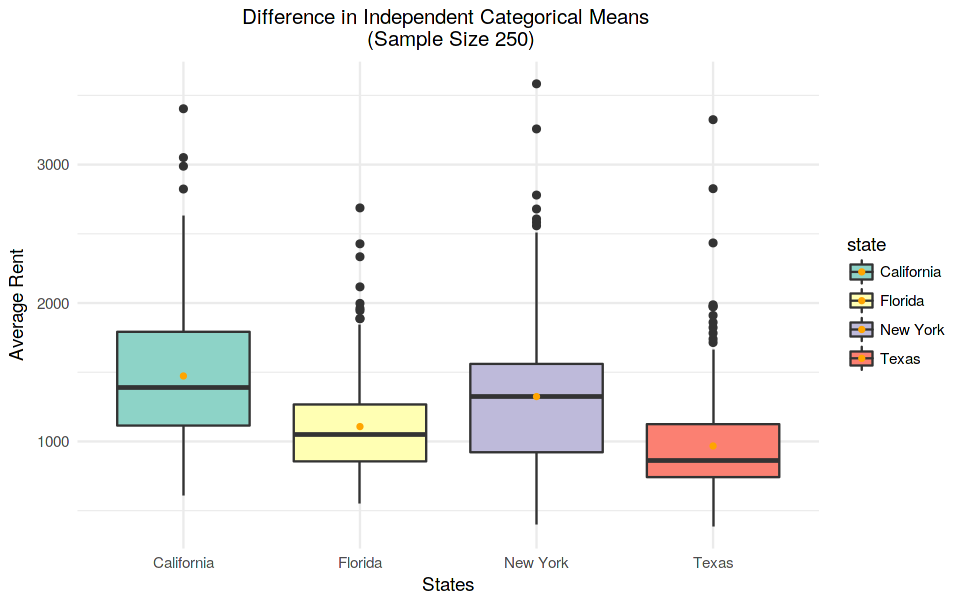

In [29]:
# Avoid Randomness
set.seed(42)

# Sampling
four_states <- df %>% select(state, rent_mean) %>% filter(!is.na(rent_mean)) %>% 
filter(state == "New York" | state == "California"| state == "Florida" | state == "Texas") %>%
group_by(state) %>% do(sample_n(., size=250))

ggplot(four_states, aes(x=state, y=rent_mean, fill=state)) + geom_boxplot() + 
stat_summary(fun.y=mean, colour="orange", geom="point", size=1) + 
theme_minimal() + theme(plot.title=element_text(hjust=0.5, size=12)) + 
labs(title="Difference in Independent Categorical Means \n (Sample Size 250)", x="States", y="Average Rent") + 
scale_fill_brewer(palette="Set3")


In [30]:
# ANOVA Testing


fours_sample <- four_states %>% ungroup() 

# Change to short abbreviations 
levels(fours_sample$state)[levels(fours_sample$state)=="Texas"] <- "Tx"
levels(fours_sample$state)[levels(fours_sample$state)=="Florida"] <- "Fl"
levels(fours_sample$state)[levels(fours_sample$state)=="California"] <- "Ca"
levels(fours_sample$state)[levels(fours_sample$state)=="New York"] <- "Ny"


aov_states <- aov(rent_mean ~ state, data=fours_sample)

aov_states

Call:
   aov(formula = rent_mean ~ state, data = fours_sample)

Terms:
                    state Residuals
Sum of Squares   37843516 190637854
Deg. of Freedom         3       996

Residual standard error: 437.4968
Estimated effects may be unbalanced

In [31]:

summary(aov_states)

             Df    Sum Sq  Mean Sq F value Pr(>F)    
state         3  37843516 12614505   65.91 <2e-16 ***
Residuals   996 190637854   191403                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

<b> Expand the summary (p-value less than 0.05), evidence to believe that not all means are equal. </b>

In [32]:
attributes(aov_states)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        

$class
[1] "aov" "lm"

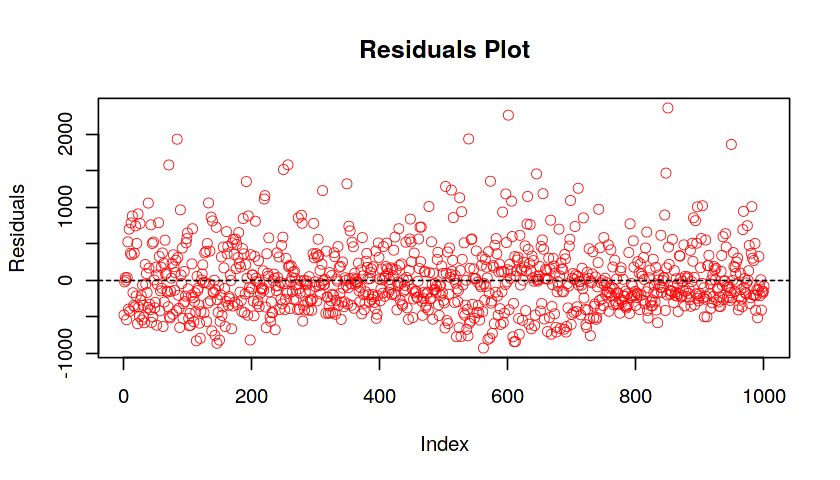

In [33]:
options(repr.plot.width=7, repr.plot.height=4)

plot(aov_states$residuals, ylab="Residuals", main="Residuals Plot", col="red", lwd = 0.5)
abline(h=0,col=1, lty=2)

<b>Texas and Florida have the highest similarity in the average rent between states according to the adjusted p-value (the highest) </b>

In [34]:
TukeyHSD(aov_states)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rent_mean ~ state, data = fours_sample)

$state
           diff       lwr        upr     p adj
Fl-Ca -365.6018 -466.3002 -264.90333 0.0000000
Ny-Ca -148.9088 -249.6072  -48.21034 0.0008636
Tx-Ca -505.7209 -606.4194 -405.02248 0.0000000
Ny-Fl  216.6930  115.9946  317.39143 0.0000002
Tx-Fl -140.1191 -240.8176  -39.42071 0.0020328
Tx-Ny -356.8121 -457.5106 -256.11370 0.0000000


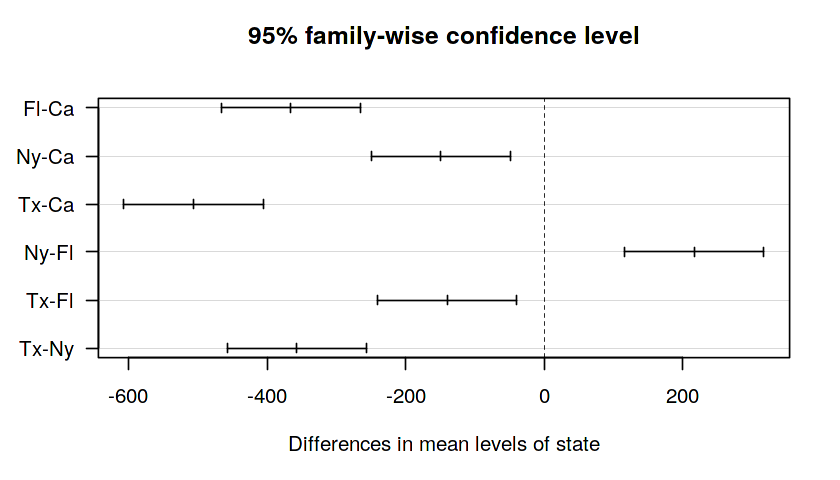

In [35]:
plot(TukeyHSD(aov_states), las=1)

### Bootstrapping (Simulation Base-Method):
<a id="bootstrapping"></a>
We make small samples from a big sample to make inference from the unknown population. Remember, the population is unknown, the dataset we have is based on samples rather than the whole US population. In this exaple, we will use as much as 1000 samples with the size of 750 observations from the big sample in order to infer what is the median of the average mortgage cost of the population. Something to mention, is that the random samples are done with replacement which means that after the first sample is taken in the second sample observations from the first sample could still be taken.


### Key intakes from Bootstrapping:
<ul>
    <li>Treat the sample as the population (in this case our entire dataset is the population). </li>
    <li>Bootstrapping can be used for many purposes but in this case we are using it to find the confidence intervals. </li>
    <li> Bootstrapping is also used when we stack models together to make certain predictions.</li>
    </ul>

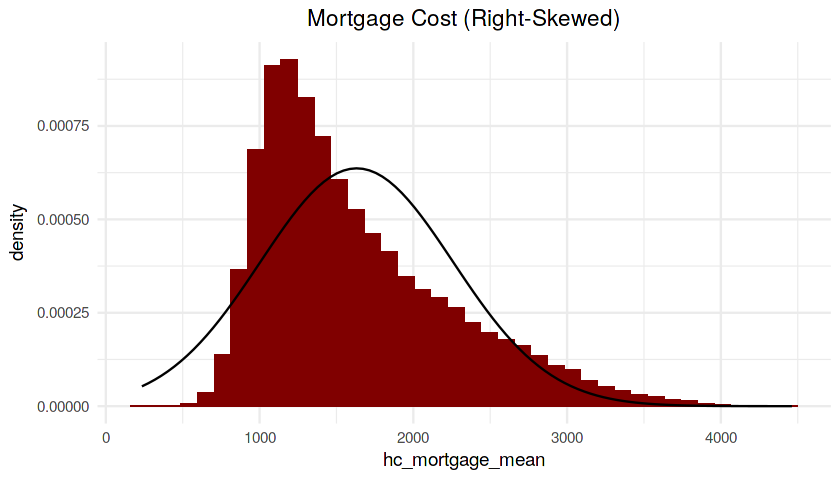

In [36]:
# Mortgage Costs Right Skew
subset_mortgage <- df %>% select(hc_mortgage_mean) %>% filter(!is.na(hc_mortgage_mean))


ggplot(data=subset_mortgage, aes(x=hc_mortgage_mean)) + geom_histogram(aes(y=..density..), bins=40, fill="#800000") + 
stat_function(fun=dnorm, color="black",
                args=list(mean=mean(subset_mortgage$hc_mortgage_mean), 
                          sd=sd(subset_mortgage$hc_mortgage_mean))) + theme_minimal() + 
labs(title="Mortgage Cost (Right-Skewed)") + theme(plot.title=element_text(hjust=0.5))


Attaching package: ‘boot’

The following object is masked from ‘package:psych’:

    logit

The following object is masked from ‘package:lattice’:

    melanoma



[1] 993.6036

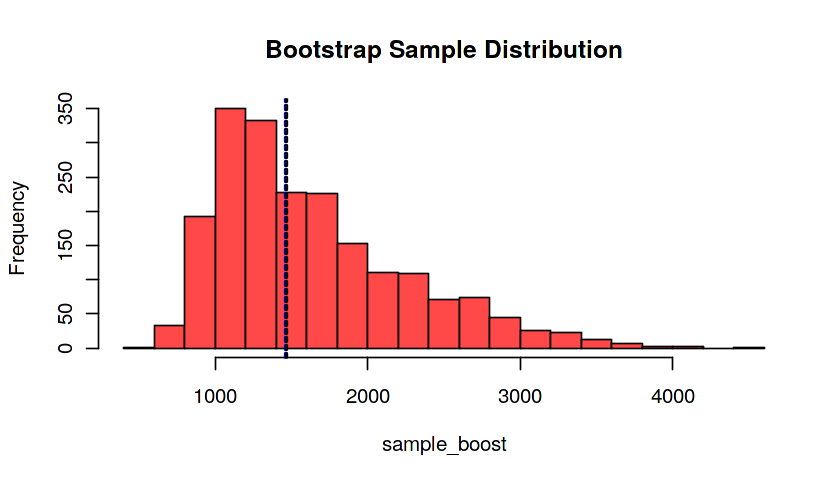

In [37]:
# Determine which variable we are going to do Bootstrappoing
# Watch again the video of Coursera
library(boot)

# Function to take the median of each sample
BootstrapMedian <- function(x=subset_mortgage$hc_mortgage_mean){
    x.boot <- sample(x, size=length(1000), replace=T)
    median(x.boot)
}

# median(subset_mortgage$hc_mortgage_mean)
BootstrapMedian()
sample_boost <- replicate(2000, BootstrapMedian())


hist(sample_boost, col="#ff4848", breaks = 25, main="Bootstrap Sample Distribution")
abline(v=median(subset_mortgage$hc_mortgage_mean), lwd=2, col="blue", lty="dashed")
abline(v=median(sample_boost), lwd=2, col="black", lty="dashed")

In [38]:
# We are 95% confident that the true median of the population is between 839 - 3180 of the mortgage cost.
# This is a wide margin.
quantile(sample_boost, probs=c(0.025, 0.975))

2.5%     97.5% 
 839.1716 3179.4704

### Mosaic Plots and Contingency Tables
<a id="mosaic"></a>
---> Description Later:

In [39]:
head(df)

UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,⋯,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
220336,NA,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,⋯,32.78177,31.91667,19.31875,440.4643,1894,0.25053,0.47388,0.30134,0.03443,0.09802
220342,NA,140,20,2,Alaska,AK,Eagle River,Anchorage,City,⋯,38.97956,39.66667,20.05513,466.6548,1947,0.94989,0.52381,0.01777,0.00782,0.13575
220343,NA,140,20,2,Alaska,AK,Jber,Anchorage,City,⋯,22.20427,23.16667,13.86575,887.6780,3570,0.00759,0.50459,0.06676,0.01000,0.01838
220345,NA,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,⋯,37.00750,34.00000,22.06347,281.4942,1049,0.20247,0.44428,0.05933,0.00000,0.21563
220347,NA,140,20,2,Alaska,AK,Anchorage,Anchorage,City,⋯,34.96611,31.75000,20.49887,655.9807,2905,0.56936,0.51034,0.08315,0.06731,0.08711
220348,NA,140,20,2,Alaska,AK,Anchorage,Anchorage,City,⋯,33.63770,28.83333,20.63591,650.4535,2560,0.45011,0.39429,0.04615,0.02418,0.10242


<b> Note: </b> Puerto Rico is not a US state it is a US territory nevertheless, I added it to the region of the Caribbean.

In [40]:
df$regions <- NA

west <- c('CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID')
south_west <- c('AZ', 'TX', 'NM', 'OK')
south_east <- c('GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN')
mid_west <- c('IL','MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND')
north_east <- c('CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME')

df$regions <- with(df, ifelse(state_ab %in% west, "West", 
                              ifelse(state_ab %in% south_west, "SouthWest",
                                    ifelse(state_ab %in% south_east, "South East",
                                          ifelse(state_ab %in% mid_west, "MidWest",
                                                ifelse(state_ab %in% north_east, "NorthEast", 
                                                       "Caribbean")))))) 


unique(df$regions)

[1] "West"       "South East" "SouthWest"  "NorthEast"  "MidWest"   
[6] "Caribbean"

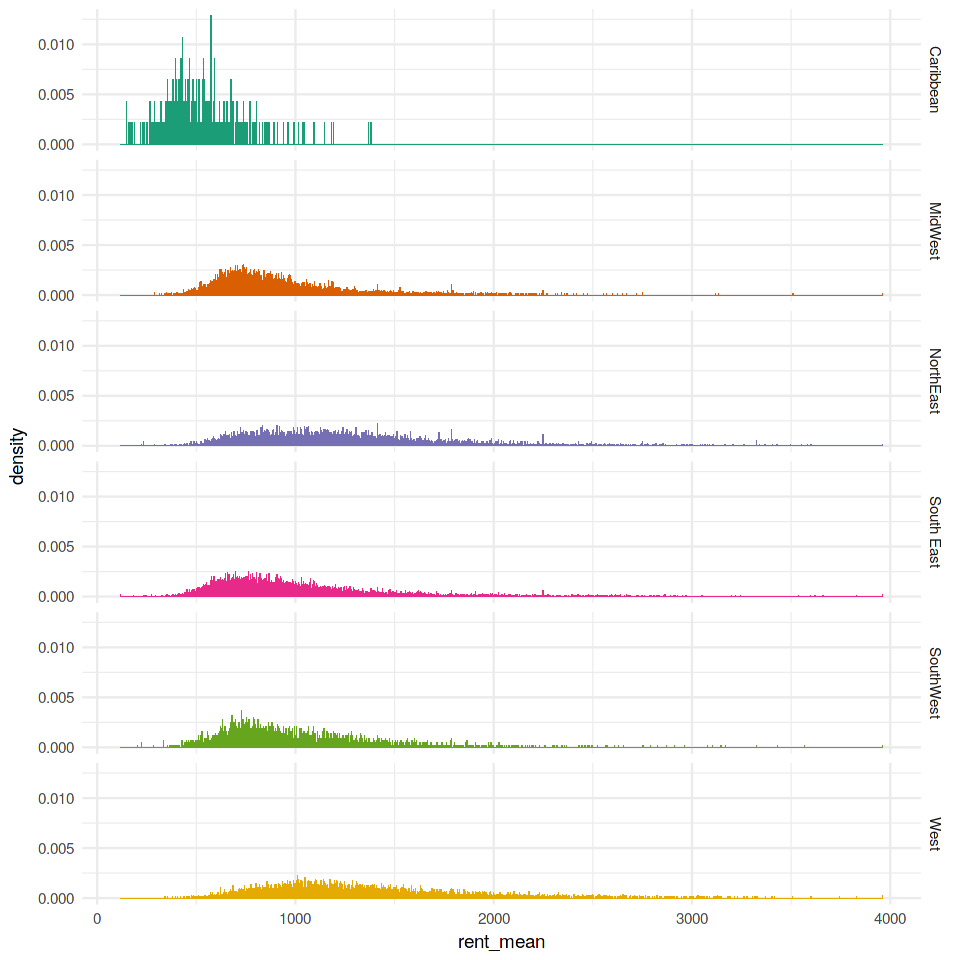

In [41]:
options(repr.plot.width=8, repr.plot.height=8)

subset_rent <- df %>% filter(!is.na(rent_mean))


ggplot(subset_rent, aes (x = rent_mean, fill= regions)) +
  geom_histogram(aes(y=..density..), binwidth = 1) + scale_fill_brewer(palette="Dark2") +
facet_grid(regions~.) + theme_minimal() + theme(legend.position="None")

In [42]:
# Create a COntingency table between the two categorical variables
cont_table <- table(df$regions, df$type)

# Let's create a frequency table

freq_df <- apply(cont_table, 2, function(x) round(x/sum(x),2))
                 
# Change the structure of our frequency table.
melt_df <- melt(freq_df)

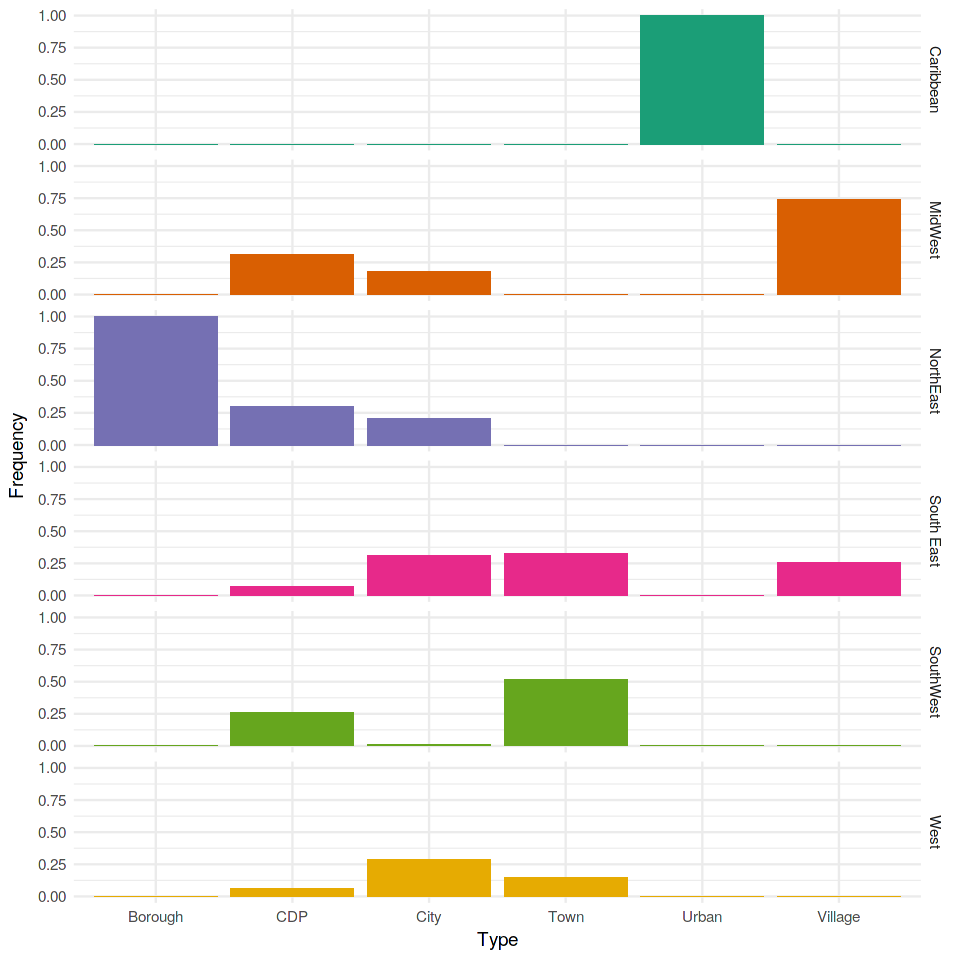

In [43]:
names(melt_df) <- c("Regions", "Type", "Frequency")


ggplot(melt_df, aes(x = Type, y = Frequency, fill = Regions)) +
  geom_col(position = "stack") +
  facet_grid(Regions ~ .) + 
scale_fill_brewer(palette="Dark2") + theme_minimal() + theme(legend.position="None")

Mosaic plots helps us determine which categorical variables are <b> underrepresented </b> and <b> overrepresented </b> in relation to each other. A chi-squared test will be used later on to examine this relationship.

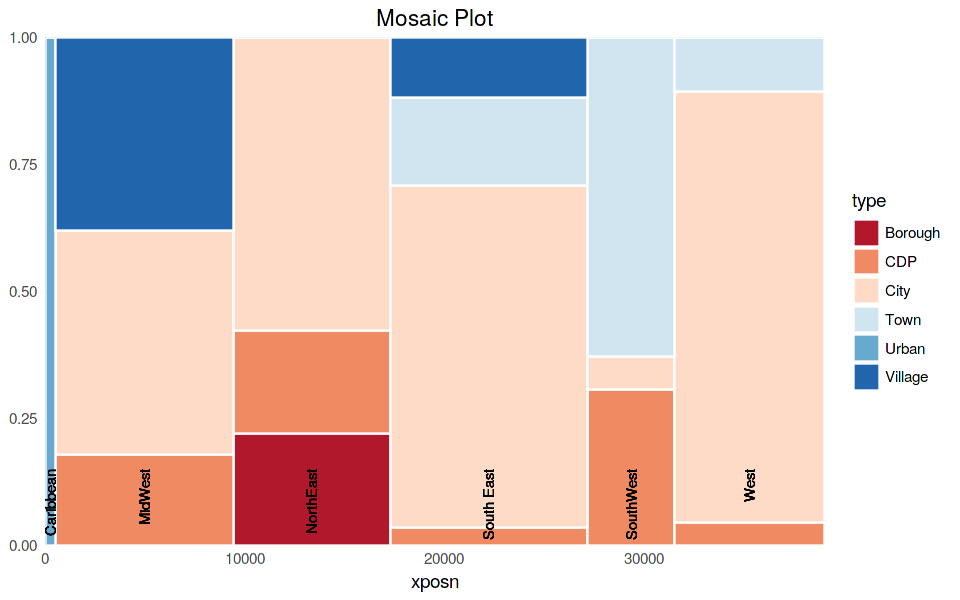

In [44]:
options(repr.plot.width=8, repr.plot.height=5)

conti_df <- as.data.frame.matrix(table(df$regions, df$type))

conti_df$groupSum <- rowSums(conti_df)
conti_df$xmax <- cumsum(conti_df$groupSum)
conti_df$xmin <- conti_df$xmax - conti_df$groupSum
# The groupSum column needs to be removed; don't remove this line
conti_df$groupSum <- NULL

conti_df$regions <- rownames(conti_df)

melt_df <- melt(conti_df, id.vars = c("regions", "xmin", "xmax"), variable.name = "type")

df_melt <- melt_df %>%
  group_by(regions) %>%
  mutate(ymax = cumsum(value/sum(value)),
         ymin = ymax - value/sum(value))


index <- df_melt$xmax == max(df_melt$xmax)
df_melt$yposn <- df_melt$ymin[index] + (df_melt$ymax[index] - df_melt$ymin[index])/2


df_melt$xposn <- df_melt$xmin + (df_melt$xmax - df_melt$xmin)/2

# geom_text for ages (i.e. the x axis)



p1<- ggplot(df_melt, aes(ymin = ymin,
                 ymax = ymax,
                 xmin = xmin,
                 xmax = xmax,
                 fill = type)) +
  geom_rect(colour = "white") +
  scale_x_continuous(expand = c(0,0)) +
  scale_y_continuous(expand = c(0,0)) +
  scale_fill_brewer(palette="RdBu") +
  theme_minimal() 

p1 + 
  geom_text(aes(x = xposn, label = regions),
            y = 0.15, angle = 90,
            size = 3, hjust = 1,
            show.legend = FALSE) + labs(title="Mosaic Plot") + theme(plot.title=element_text(hjust=0.5))

### Detecting outliers through Standard Deviations:
In this section, we will detect possible outliers. Although, I should mention that outliers should be carefully analyzed and individuals should be really carefull when it comes to deleting an observation in which that person believe a particular observation is an outlier.

<b> Concepts to remember: </b>
<ul>
    <li> <b> Distribution: </b> It is recommended to use a normal distribution to detect outliers when using standard deviations.  </li>
    <li><b>Standard deviation: </b>  If the standard deviation is 3 or greater we will consider it as an outlier.</li>
    </ul>

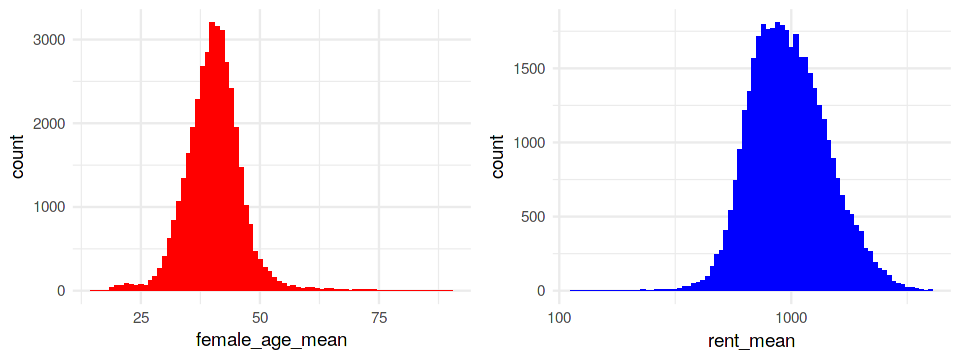

In [45]:
options(repr.plot.width=8, repr.plot.height=3)

# Let's look for normal distributed variables
fem_age <- df %>% select(female_age_mean) %>% filter(!is.na(female_age_mean)) %>%
ggplot(aes(x=female_age_mean)) + geom_histogram(binwidth=1, fill="red") + theme_minimal()

rent <- df %>% select(rent_mean) %>% filter(!is.na(rent_mean)) %>%
ggplot(aes(x=rent_mean)) + geom_histogram(fill="blue", binwidth=0.02) + 
scale_x_log10() + theme_minimal()

plot_grid(fem_age, rent, align='h', ncol=2)

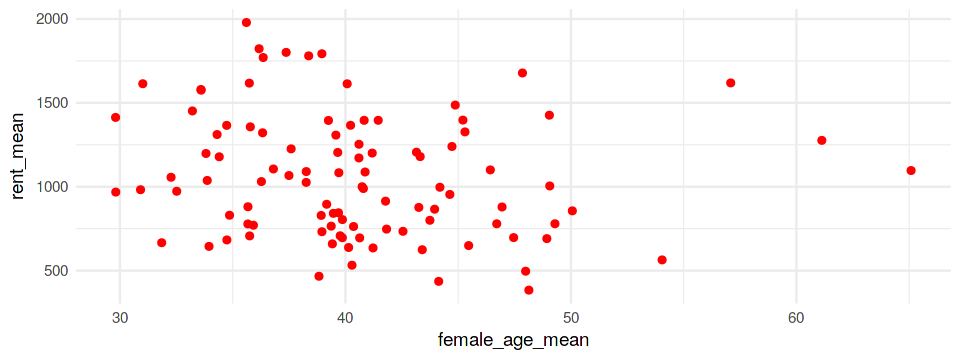

In [46]:
# Bivariate Analysis
female_rent <- df %>% select(female_age_mean, rent_mean) %>% filter(!is.na(female_age_mean), !is.na(rent_mean))

set.seed(1)
small_sample <- female_rent %>% sample_n(100) 

ggplot(small_sample, aes(x=female_age_mean, y=rent_mean)) + geom_point(col="red") + theme_minimal()

In [47]:
sample_std <- small_sample %>%
  mutate(sd_female = (female_age_mean-mean(female_age_mean))/sd(female_age_mean),  
         sd_rent = (rent_mean-mean(rent_mean))/sd(rent_mean))



# The standard deviation how far is the value away from the mean and 
# Standard deviation for the rent.
head(sample_std)

female_age_mean,rent_mean,sd_female,sd_rent
34.73381,1365.735,-0.937317532,0.8342994
40.59835,1171.613,0.009503764,0.3014084
45.21043,1397.173,0.754117248,0.9206019
36.32559,1321.518,-0.680327009,0.7129178
34.40384,1178.490,-0.990590700,0.3202864
36.17073,1822.606,-0.705328926,2.0884747


### Up Next We will use these metrics to detect "Possible outliers".

### Up Next: Understanding Chi-Squared Tests and Standarized Residuals: (This is still being updated)

<img src="https://i.stack.imgur.com/H59e8.png">

Standardized residual = $\frac{(observed\ count – expected\ count)} {\sqrt{expected\ count}}$<br>
Expected Count = $\frac{\sum{data\ in\ row\ + data\ in\ col}}{total\ data}$

In [48]:
cont_table <- table(df$type, df$regions)
#  Change to dataframe
df_cont_table <- as.data.frame.matrix(cont_table)


df_cont_table$Total <- colSums(df_cont_table)


df_cont_table <- df_cont_table%>% adorn_totals("row")


df_cont_table

Caribbean,MidWest,NorthEast,South East,SouthWest,West,Total
0,0,1735,0,0,0,489
0,1591,1589,351,1350,335,8926
0,3930,4541,6631,287,6329,7865
0,0,0,1727,2767,806,9876
489,0,0,0,0,0,4404
0,3405,0,1167,0,0,7470
Total,8926,7865,9876,4404,7470,39030


In [49]:
# This simple test tells us there is a difference between these two columns (Low p-value.)
results <- chisq.test(table(df$regions, df$type))

resid <- melt(results$residuals)
resid

Var1,Var2,value
Caribbean,Borough,-4.6623502
MidWest,Borough,-19.9195217
NorthEast,Borough,74.0914735
South East,Borough,-20.9527487
SouthWest,Borough,-13.9918171
West,Borough,-18.2226177
Caribbean,CDP,-8.0839561
MidWest,CDP,11.5270603
NorthEast,CDP,16.5918546
South East,CDP,-26.6679975


### Visualizing US State Map with GGPlot2

<a id="us_map"></a>



The goal of doing this visualization is to show the community a simple way for visualizing US maps using ggplot2 and the map library. This is useful when you would want to present visually which states or country had a high or low numeric variables.

**Summary of Findings:**
<ul>
    <li>States with Average high divorce rates: States with high divorce rates include Nevada, Oklahoma, Arkansas and West Virginia.</li>
    <li>States with Average low divorce rates: States with low divorce rates include California, Utah, New York and New Jersey </li>
</ul>




Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map



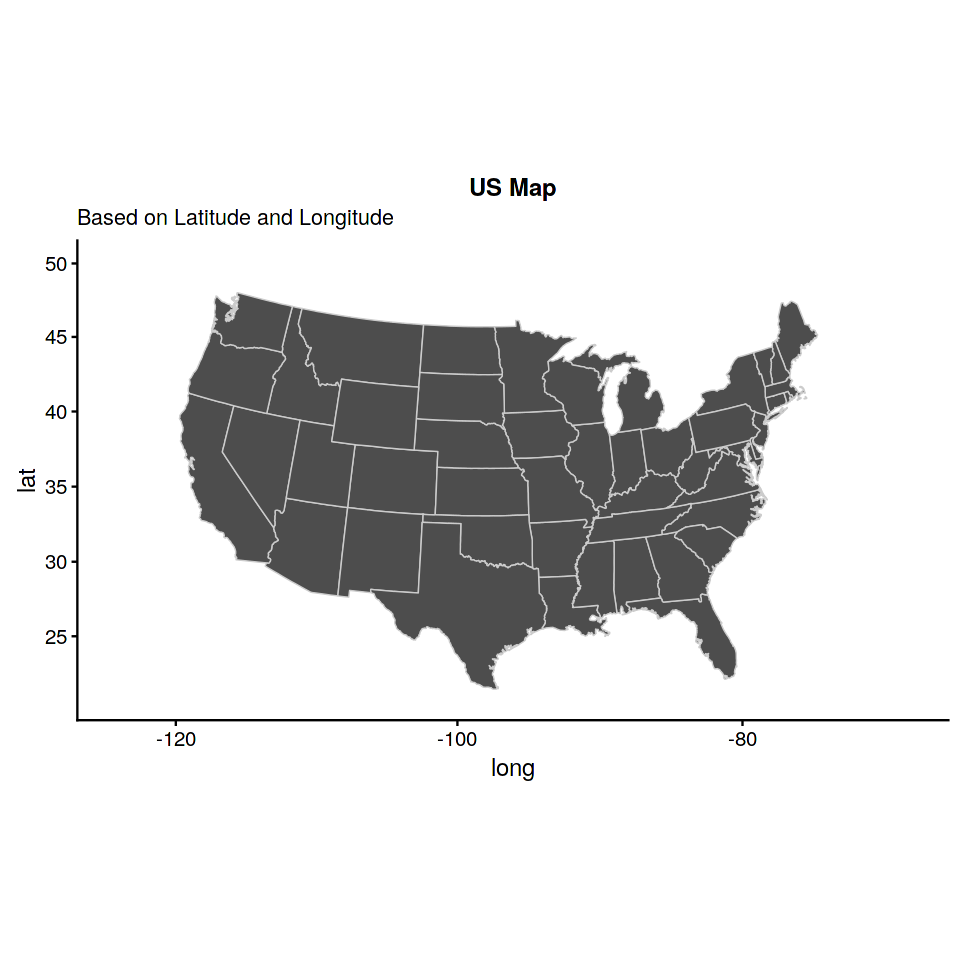

In [50]:
options(repr.plot.height = 8)


us_map <- map_data("state") %>% 
as_tibble()


us_map %>%
ggplot(aes(long, lat, map_id = region)) + 
geom_map(
    map =us_map,
    color = "gray80",
    fill = "gray30",
    size = 0.3
) + 
coord_map("ortho", orientation = c(39, -98, 0)) + 
labs(
    title = "US Map",
    subtitle = "Based on Latitude and Longitude"
) + theme(plot.title = element_text(hjust=0.5))

In [51]:
# Highest percent of divorced by state on average



# First we will need to join tables
divorced_tbl <- df %>% select(state, state_ab, divorced) %>%
group_by(state, state_ab) %>%
summarise(
    avg_div_rate = mean(divorced, na.rm=TRUE),
    avg_div_txt = scales::percent(avg_div_rate)
) %>% 
ungroup() %>% 
mutate(state = str_to_lower(state)) %>%
left_join(us_map, by=c("state" = "region"))



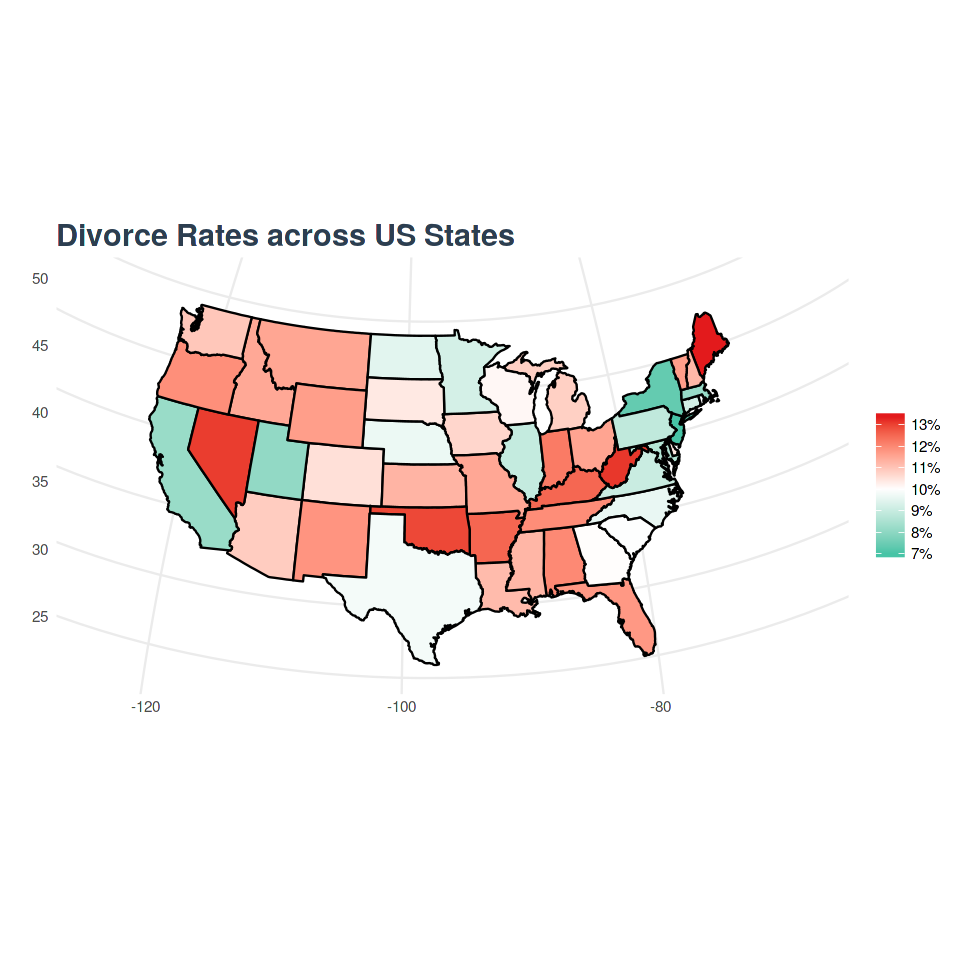

In [52]:


divorced_tbl %>%
ggplot(aes(long, lat, group = subregion)) + 
geom_map(
    aes(map_id = state),
    map = us_map,
    color = "gray80",
    fill = "gray30",
    size=0.3
) + coord_map("ortho", orientation = c(39, -98, 0)) + geom_polygon(aes(group = group, fill = avg_div_rate), color="black") +
scale_fill_gradient2("",low = "#18BC9C", mid = "white", high = "#E31A1C", midpoint = 0.10, labels = scales::percent) + 
theme_minimal() + 
theme(
    plot.title = element_text(size=18, face="bold", color = "#2C3E50"),
    legend.position = "right"
) + 
labs(
    title = "Divorce Rates across US States",
    x = "",
    y = ""
)



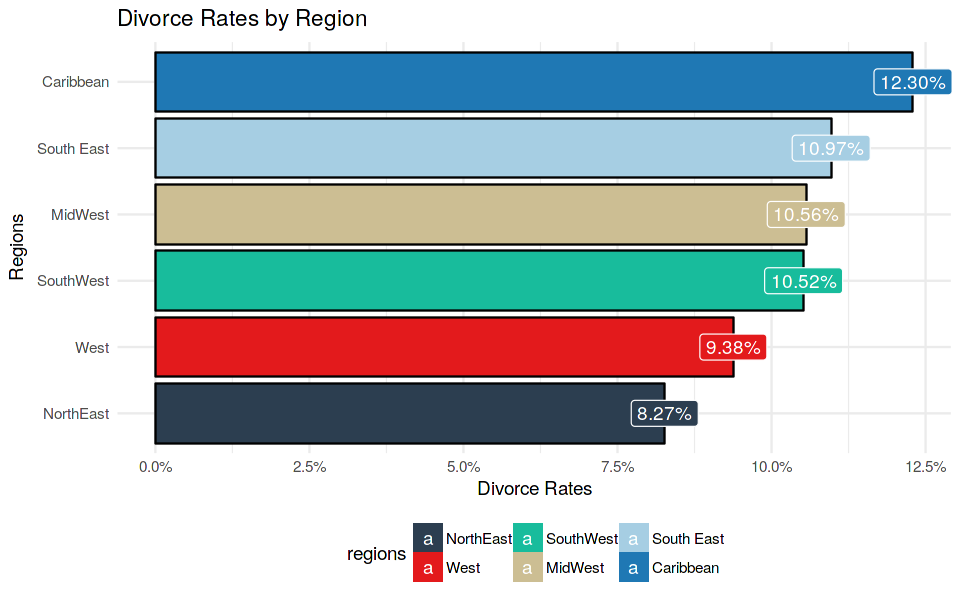

In [53]:
# Percent divorced by region
suppressMessages(library(tidyquant))

options(repr.plot.height = 5)

div_rates <- df %>%
select(regions, divorced) %>%
group_by(regions) %>%
summarise(
    avg_div_rate = mean(divorced, na.rm=TRUE)
) %>%
ungroup() %>%
mutate(
    regions = regions %>% as_factor() %>% fct_reorder(avg_div_rate)
)

div_rates %>%
ggplot(aes(x=regions, y=avg_div_rate, fill=regions)) + geom_col(color="black") + theme_minimal() + scale_fill_tq() + 
theme(legend.position="bottom") + geom_label(aes(label=scales::percent(avg_div_rate)), color="white") + 
labs(
    title = "Divorce Rates by Region",
    y = "Divorce Rates", 
    x = "Regions"
) + coord_flip() + scale_y_continuous(labels = scales::percent)

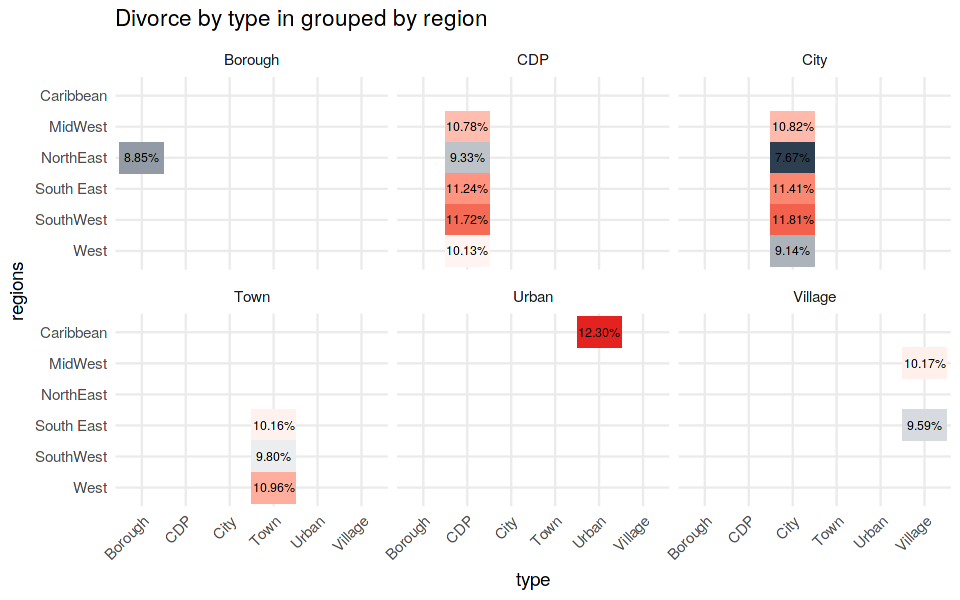

In [54]:


heatmap_tbl <- df %>%
select(regions, state, type, divorced) %>%
group_by(regions, type) %>%
summarise(
    avg_div_rate = mean(divorced, na.rm=TRUE)
) %>% ungroup() %>%
mutate(
    regions = regions %>% as_factor %>% fct_rev()
)



heatmap_tbl %>%
ggplot(aes(type, regions)) + 
geom_tile(aes(fill=avg_div_rate)) + scale_fill_gradient2(low=palette_light()[1], 
                                                         mid="white", 
                                                         high = palette_light()[2], 
                                                         midpoint=0.10) + facet_wrap(~type) + theme_minimal() + 
theme(legend.position="none", axis.text.x = element_text(angle=45, hjust=1)) + geom_text(aes(label = scales::percent(avg_div_rate)), size=2.5) + 
labs(
    fill = "",
    title = "Divorce by type in grouped by region"
)



### Statistical Plots

Warning message:
“Removed 825 rows containing missing values (geom_point).”

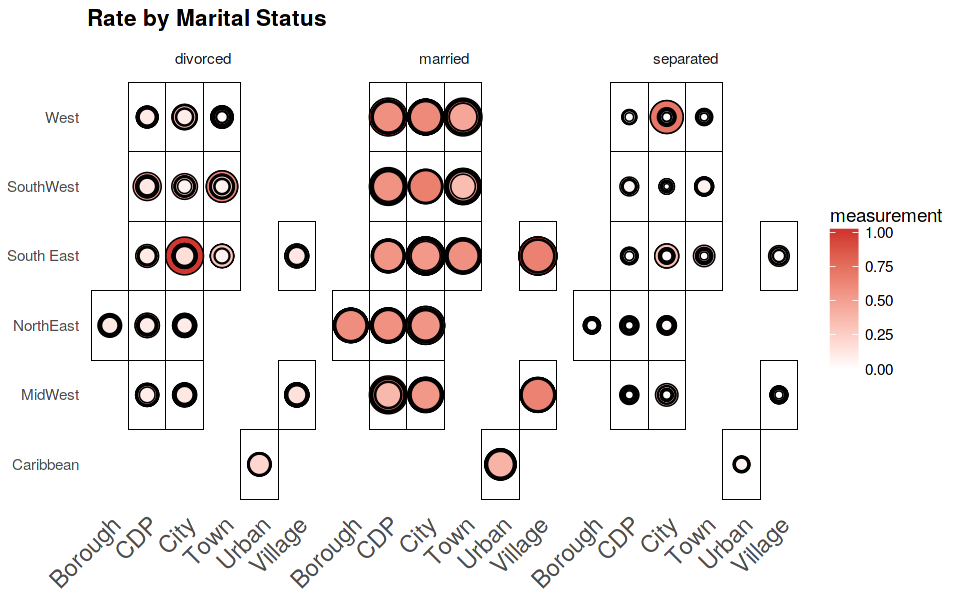

In [55]:
prepared_df <- df %>% select(regions, type, divorced, separated, married)


long_tbl <- prepared_df %>%
gather(key = "status", value = "measurement", divorced:married)

# Balloon Plot
ggballoonplot(long_tbl, x = "type", y = "regions",
              size = "measurement", fill = "measurement", facet.by = "status", shape = 21,  ggtheme=theme_minimal()) +
   scale_fill_gradient2(low = "#2E604A", mid = "white", high = "#D1362F") +
  guides(size = FALSE) + 
labs(
    title = "Rate by Marital Status"
  ) + 
  theme(panel.grid.major = element_blank(),
        axis.text.x = element_text(size = 14),
        plot.title = element_text(face = "bold"),
        plot.subtitle = element_text(face = "bold"),
        axis.ticks = element_blank()) + 
geom_tile(color = "black", fill = "transparent")



Warning message:
“Using `bins = 30` by default. Pick better value with the argument `bins`.”Warning message:
“Removed 825 rows containing non-finite values (stat_bin).”

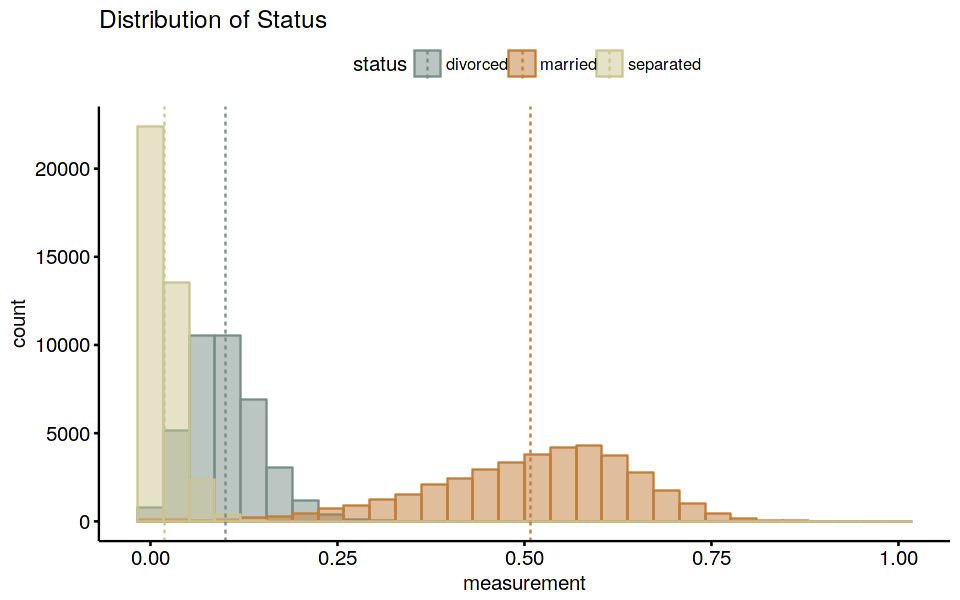

In [56]:
library(wesanderson)


long_tbl %>%
gghistogram(x="measurement", color = "status", fill="status", palette= wes_palette("Moonrise2"), add="mean") + 
ggtitle("Distribution of Status")

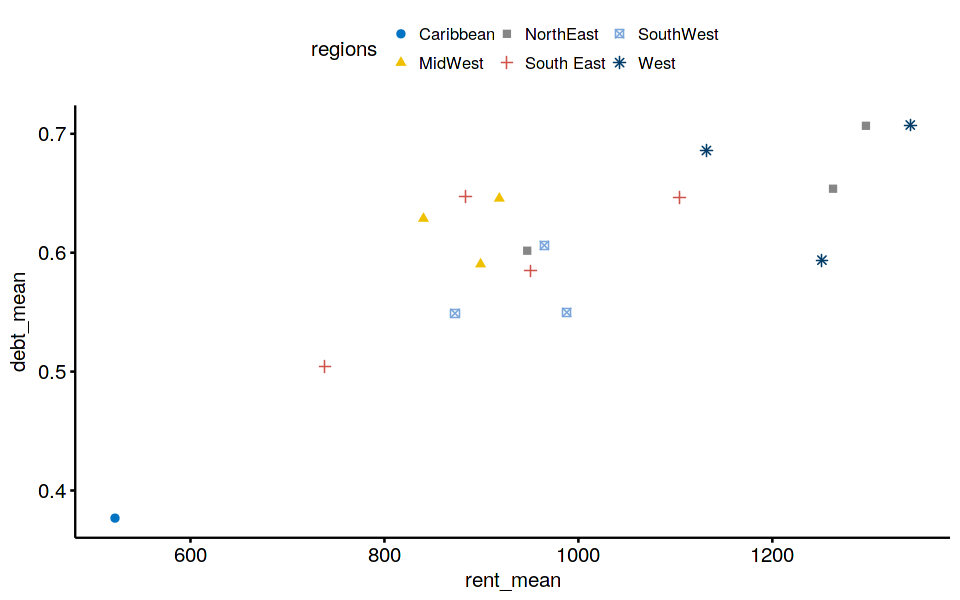

In [57]:
# Factor will be regions
# x will be debt
# y will be rent_mean 
# Is debt higher where rent is higher
# Which regions have the highest level of rent and debt


prepared_tbl <- df %>% select(regions, type, rent_mean, debt) %>%
group_by(regions, type) %>%
summarise(
    rent_mean = mean(rent_mean, na.rm=TRUE),
    debt_mean = mean(debt, na.rm=TRUE)
) %>% ungroup()


ggscatter(prepared_tbl, x = "rent_mean", y = "debt_mean",
          color = "regions", palette = "jco",           
          shape = "regions") 
